<a href="https://colab.research.google.com/github/omerbmk/CIND-820-OmerMirza/blob/main/CIND_820_Bank_Telemarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

CIND-820 Final Project

Dataset: Portuguese Bank Telemarketing

To start we will load some basic libraries such as Pandas and NumPy and then make some configuration to some of those libraries.

In [462]:
import os
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
#import matplotlib as plt
matplotlib.use(u'nbAgg')
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import statistics
import scipy
import plotly.express as px


#Data Pre-Processing

##Loading data
In this first step we will load our dataset that has been uploaded on my GitHub for easier process. From the dataset documentation found here we can see below are the list of column we have in our data:

Attribute Information:

Input variables:

# bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

# Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no'

In [463]:
#Load dataset
file_name = "https://raw.githubusercontent.com/omerbmk/CIND-820-OmerMirza/main/bank-additional-full.csv"
bank = pd.read_csv(file_name, sep=';')

In [464]:
df_bank = pd.read_csv(file_name, sep=';')

In [465]:
df_bankc = pd.read_csv(file_name, sep=';')
# Here we use the apply funtion to transform 'y' from yes or no to 0s and 1s
df_bankc['converted'] = df_bankc['y'].apply(lambda x: 0 if x == 'no' else 1)
del df_bankc['y']
#df_bankc.head()

In [466]:
# Create list of features
cat_features = list(df_bank.select_dtypes('object').columns)
int_features = list(df_bank.select_dtypes('int64').columns)
float_features = list(df_bank.select_dtypes('float64').columns)
num_features = int_features+float_features

#EDA - Exploratory Data Analysis
  
  1.  Check data shape & Feature (num of Rows & Columns)
  2.  Description of data (Numerical and Categorical)
  5.  Understanding relationships and new insights through plots
  6.  Check each data type of columns and missing values
  9.  Check the percentages of missing value
  10. Summary Statistics
  11. Check value counts for a specific column
  12. Check duplicate values and deal with it
  13. See the data distribution and data anomaly
  14. Check the correlation between variables in the data

3.  Handling missing data
  4.  Handling outliers
 7.  Splitting values
  8.  Change the data type











### Data data shape & Feature (num of Rows & Columns)

In [467]:
# 1. Check data shape & Feature (num of Rows & Columns)
print('Shape of dataframe (Cols, rows):', df_bank.shape)
print(f"Number of clients: .............. {df_bank.shape[0]}") # Number of observations
print(f"Number of variables: ............ {df_bank.shape[1]} ") # Number of variables or attributes
print (f"\nFeatures : \n" ,df_bank.columns.tolist()) 


Shape of dataframe (Cols, rows): (41188, 21)
Number of clients: .............. 41188
Number of variables: ............ 21 

Features : 
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [468]:
# 2.a Description of data 
# General stats of numeric variables
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000




1.   age: the youngest client has 17 years old and the oldest has 98 years with a median of 38 years whilst the average is 40 years old

2. pdays: The majority of the clients have the 999 number wich indicates that most people did not contact nor were contacted by the bank. Those are considered to be 'out of range' values

3. previous: The vast majority were never contacted before

4. emp_var_rate: during the period the index varied from [-3.4, 1.4]

5. cons_price_idx: the index varied from [92.2, 94.8]

6. cons_conf_idx: the consumer confidence level during that period kept always negative with a range of variation of [-51, -27]. These negative values might be explained by the recession that severely affected Portugal due the financial global crisis during that same period the data was recorded

7. euribor3m: there were a huge variation of the euribor rate during the period of analysis [5% to 0.6%]. This abrupt change in euribor together with the negative confidance verified reinforces the hipothesis that this data provides information from a crisis period

8. nr_employed: the number of employed people varied around 200 during the campaign



In [469]:
#2.b Description of data 
# General stats of categoric variables
bank.describe(include=['object']) 

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


1. job:there are 12 types of jobs recordings in wich the 'administrative' role is the most comum with almost 10.5k of the clients

2. marital:the majority of clients are married with almost 25k records

3. education:more than 12k people have university degree

4. default:from all the 41.188 clients, 32.588 don't have any credit in default

5. housing:almost half of the customers have a housing loan

6. loan:almost 34k clients don't have any personal loans

7. poutcome:there is no information about the outcome of any previous marketing campaign




In [470]:
# To View data in table structure To get the first 5 top and bottom rows
df_bank.head(-100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,24,technician,single,university.degree,no,yes,yes,cellular,nov,tue,...,3,6,3,failure,-1.1,94.767,-50.8,1.049,4963.6,yes
41084,18,student,single,unknown,no,yes,no,cellular,nov,tue,...,2,999,3,failure,-1.1,94.767,-50.8,1.049,4963.6,no
41085,51,admin.,divorced,high.school,no,yes,yes,cellular,nov,tue,...,2,6,4,failure,-1.1,94.767,-50.8,1.049,4963.6,yes
41086,50,blue-collar,divorced,professional.course,no,yes,no,cellular,nov,tue,...,2,9,3,success,-1.1,94.767,-50.8,1.049,4963.6,no


In [471]:
#Check each data type of columns
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [472]:
# To Check for Duplicate Value
print(f"Number of duplicate entries: .... {bank.duplicated().sum()}")

Number of duplicate entries: .... 12


In [473]:
# To Check for Missing Value
print (f"\nMissing values :  ", bank.isnull().sum().values.sum())
#print (f"\nMissing values of each attributes :  ",df_bank.isnull().values.any())
print (f"\nMissing values of each attributes :\n",df_bank.isna().sum())


Missing values :   0

Missing values of each attributes :
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [474]:
# To check Unique Value
print (f"\nUnique values :  \n", df_bank.nunique())


Unique values :  
 age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64


In [475]:
#How many o values in every attribute
print(f"\n 0 value in every attribute :\n", df_bank.isin([0]).sum())


 0 value in every attribute :
 age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
dtype: int64


In [476]:
bank.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [477]:
df_bank.isnull().sum() / df_bank.shape[0] * 100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

###The dataset is highly embalanced.
From the above information we can clearly state that the dataset is absolutely embalanced with the 0:'no' aproximately 8 times higher than 1:'yes'.


[0] Number of clients that haven't subscribed the term deposit: ... 36548
[1] Number of clients that have subscribed the term deposit: ....... 4640



,clients,%
0,36548,88.73
1,4640,11.27


<IPython.core.display.Javascript object>

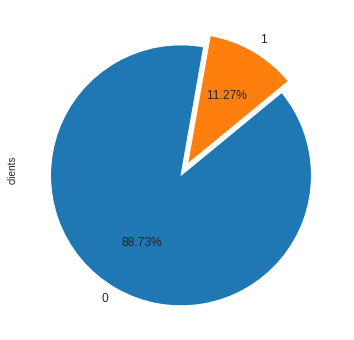

In [478]:
# Converting the target from binary/categoric into binary/numeric
df_bank['target'] = df_bank.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)
#df_bank.drop(["y"],axis=1,inplace=True)

absolut = df_bank.target.value_counts().to_frame().rename(columns={"target":"clients"})
percent = (df_bank.target.value_counts(normalize=True)*100).to_frame().rename(columns={"target":"%"})
df_bank_bal = pd.concat([absolut,percent],axis=1).round(decimals=2)
print("")
print(f"[0] Number of clients that haven't subscribed the term deposit: ... {df_bank.target.value_counts()[0]}")
print(f"[1] Number of clients that have subscribed the term deposit: ....... {df_bank.target.value_counts()[1]}")
print("")
display(df_bank_bal)
absolut.plot(kind='pie', subplots=True, autopct='%1.2f%%', 
             explode= (0.05, 0.05), startangle=80, 
             legend=False, fontsize=12, figsize=(14,6));

<IPython.core.display.Javascript object>

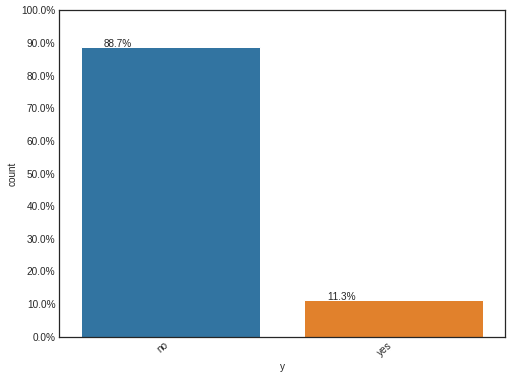

In [479]:
plt.figure(figsize=(8,6))
Y = df_bank["y"]
total = len(Y)*1.
ax=sns.countplot(x="y", data=df_bank)
for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks.
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.legend(labels=["no","yes"])
plt.show()

#Numeric variables Analysis

In [480]:
df_bankn = df_bank.select_dtypes(include = np.number)
df_bankn.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  int64  
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp.var.rate    41188 non-null  float64
 6   cons.price.idx  41188 non-null  float64
 7   cons.conf.idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr.employed     41188 non-null  float64
 10  target          41188 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 3.5 MB


In [481]:
# View the number of unique elements in each feature
df_bankn.nunique()

age                 78
duration          1544
campaign            42
pdays               27
previous             8
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
target               2
dtype: int64

In [482]:
# Check global outliers using 0.05 quantile and 0.95 quantile
min_p = df_bankn.quantile(0.05)
max_p = df_bankn.quantile(0.95)

# Column vs Number of Outliers
((df_bankn <= min_p) | (df_bankn >= max_p)).sum()

age                4596
duration           4152
campaign          20048
pdays             41188
previous          41188
emp.var.rate      19140
cons.price.idx     6897
cons.conf.idx      5263
euribor3m          4530
nr.employed       19363
target            41188
dtype: int64

In [483]:
def plotting_kd(df_bank,columns,hue=None):
    if hue==None:    
       plot=sns.FacetGrid(df_bank,size=10).map(sns.distplot,columns)
    else:
        plot=sns.FacetGrid(df_bank,hue=hue,size=10).map(sns.distplot,columns)
        plt.legend()


def violinplot_columns(columns,y='y'):
    figure(figsize=(15,10))
    sns.violinplot(x=df_bank[y],y=df_bankn[columns],hue=df_bank['y'],showfliers=False)
    plt.title(columns.upper())

<IPython.core.display.Javascript object>

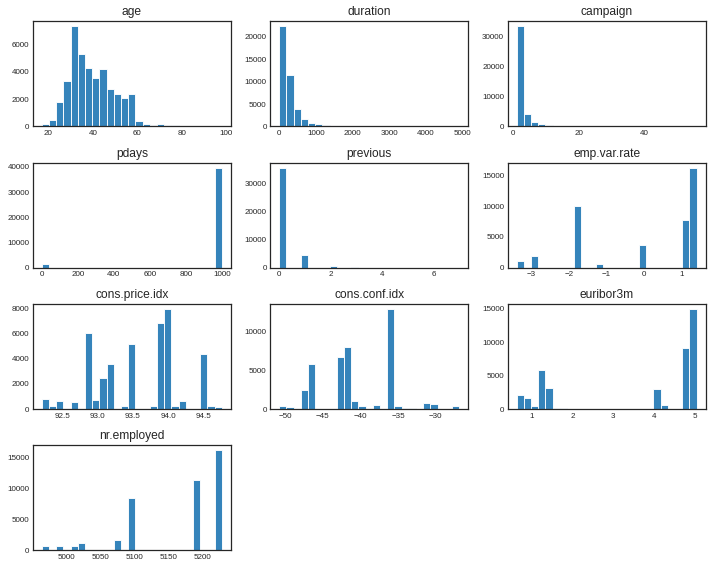

In [484]:
# Visualization of the numeric distribution
df_bank[num_features].hist(figsize=(10,8), bins=25, xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False) 
plt.tight_layout();

###1. **Age Analysis**

*   Personal Attributes
*   age of customer



In [485]:
#df_bankn['age'].unique()

In [486]:
# General stats description of AGE
print (df_bankn.iloc[:,0].describe())
print(f"the median age is :", (statistics.median(df_bankn.iloc[:,0])))
print(f"the varaince of age is:",df_bankn.age.var())
print(f"the Skewness of age is:",scipy.stats.skew(df_bankn.age))
print(f"the Kurtosis of age is:",scipy.stats.kurtosis(df_bankn.age))

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
the median age is : 38.0
the varaince of age is: 108.60245116512178
the Skewness of age is: 0.7846682380932289
the Kurtosis of age is: 0.7910698035273853


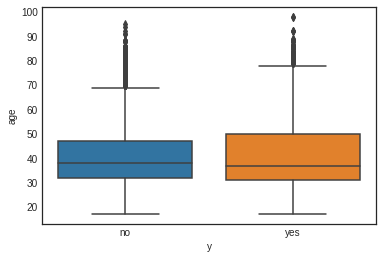

In [487]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="age")


From the above boxplot  it is clearly visible that there are outliers present for both the class. We know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

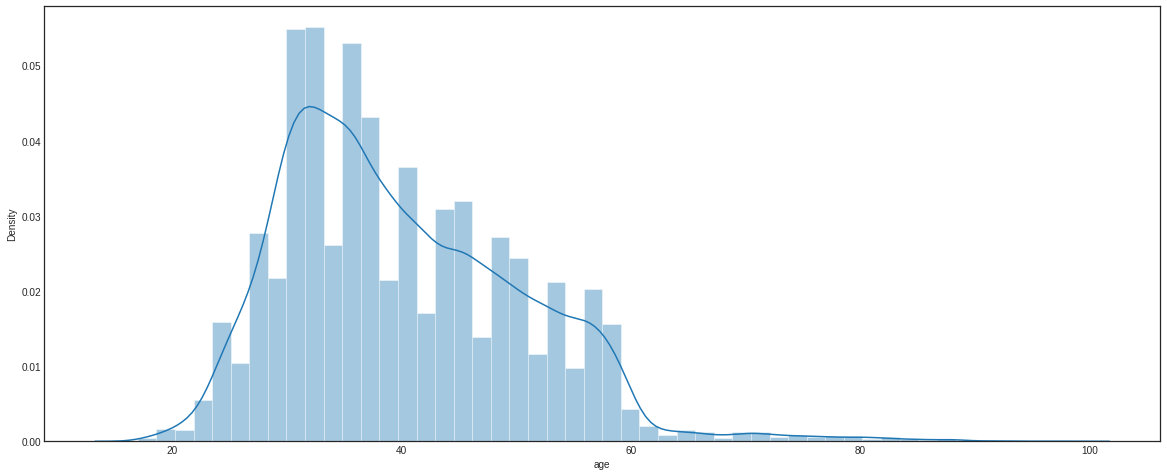

In [488]:
plt.figure(figsize=(20,8))
sns.distplot(df_bankn["age"])

1. As we can see in the above distribution also, that most of the customers are in the age range of 30-40

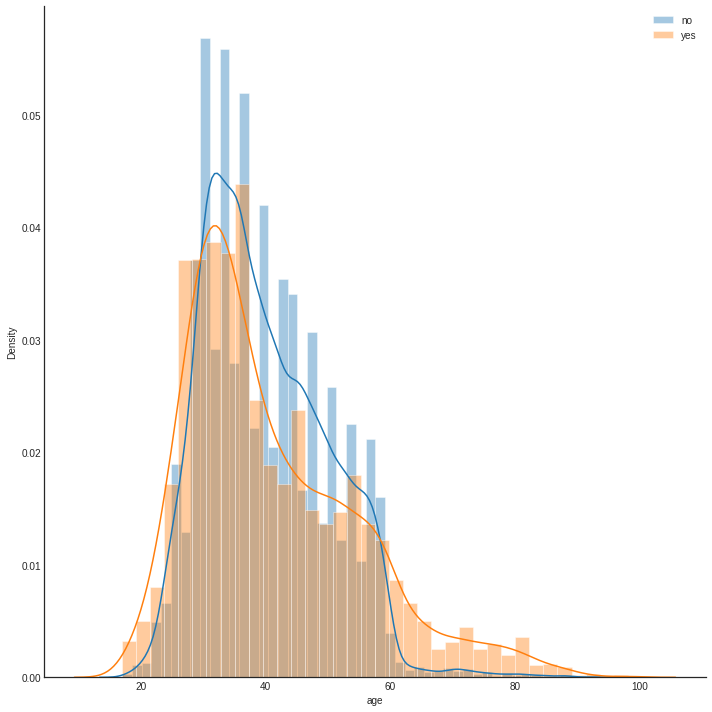

In [489]:
plotting_kd(df_bank,'age',hue='y')

Plotting kdeplot with hue as classes it is more clear that age might not be very helpful in prediction of class labels because there is so much of overlapping.

age_bins
Young     15.207373
Adult      9.430005
Senior    45.494505
Name: target, dtype: float64

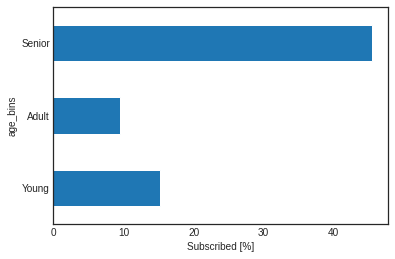

In [490]:
# Converting the target from binary/categoric into binary/numeric
df_bank['target'] = df_bank.apply(lambda row: 1 if row["y"] == "yes" else 0, axis=1)

df_bank['age_bins'] = pd.cut(df_bank['age'], bins = [df_bank['age'].min(), 30, 60, df_bank['age'].max()], 
                  labels=['Young', 'Adult', 'Senior'])

group_age_target = df_bank.groupby(['age_bins'])['target'].mean().multiply(100)

display(group_age_target)
print("")

# Display graph
group_age_target.plot.barh()
plt.xlabel('Subscribed [%]');

It is very clear the relation betweem the subscription rate and age of customers:

1. 45.5% of Seniors (+60 years old) subscribed to the term deposit
2. less than 10% Adults (>30 and <=60 years old) subscribed
3. Young people were the 2nd group that subscribed the deposit corresponding to 1/6 of all young people


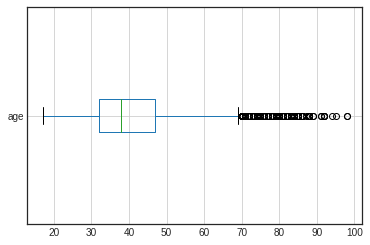

In [491]:
# boxplot for age for Outliiers
df_bankn.boxplot(column=['age'],vert = False)

Min age in 17 and Max age is 98, so there is no contextual outliers 

###2. **Duration**

*   related with the last contact of the current campaign:
*   last contact duration, in seconds 



In [492]:
#df_bankn['duration'].unique()
#df_bank["duration"].value_counts()

In [493]:
# General stats description of DURATION
print (df_bankn.iloc[:,1].describe())
print(f"the median duration is :", (statistics.median(df_bankn.iloc[:,0])))
print(f"the varaince of duration is:",df_bankn.duration.var())
print(f"the Skewness of duration is:",scipy.stats.skew(df_bankn.duration))
print(f"the Kurtosis of duration is:",scipy.stats.kurtosis(df_bankn.duration))

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
the median duration is : 38.0
the varaince of duration is: 67225.72887720143
the Skewness of duration is: 3.2630224157610432
the Kurtosis of duration is: 20.245334438614844


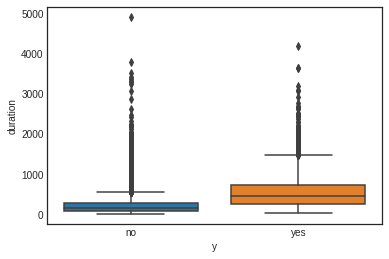

In [494]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="duration")


From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

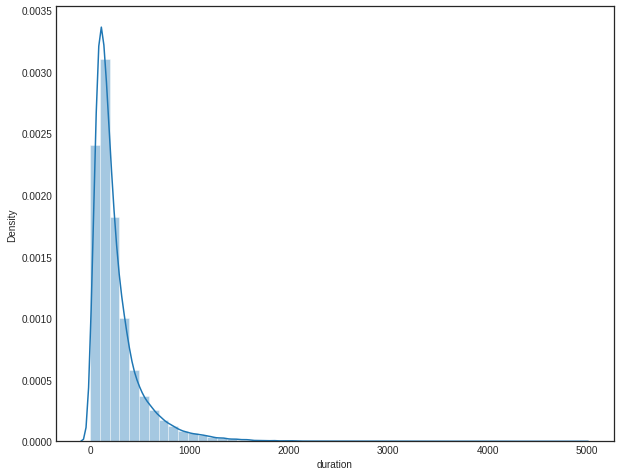

In [495]:
plt.figure(figsize=(10,8))
sns.distplot(df_bank["duration"])


This seems like a powerlaw distribution where most the values are very low and very few have high values.

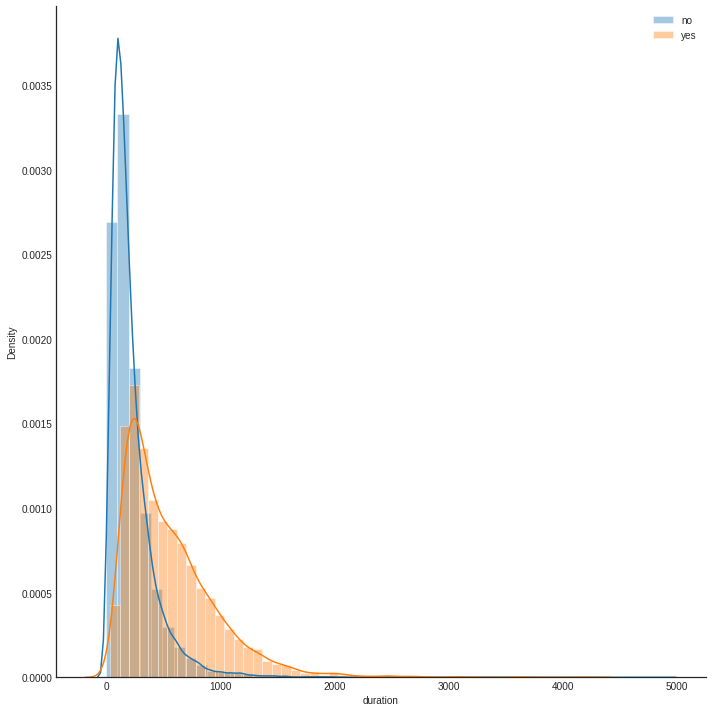

In [496]:
plotting_kd(df_bank,'duration',hue='y')

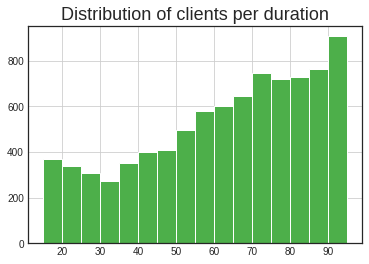

In [497]:
base_color = sns.color_palette('Set1')[2]

duration_bins = np.arange(15, 100, 5)
plt.hist(data = df_bank, x = 'duration', bins = duration_bins, color = base_color);
plt.title("Distribution of clients per duration", fontsize=18)
plt.grid();

###3. **Campaign**

*   other campaign attributes:
*   number of contacts performed during this campaign and for this client 



In [498]:
# General stats description of CAMPAIGN
print (df_bankn.iloc[:,2].describe())
print(f"the median campaign is :", (statistics.median(df_bankn.iloc[:,0])))
print(f"the varaince of campaign is:",df_bankn.campaign.var())
print(f"the Skewness of campaign is:",scipy.stats.skew(df_bankn.campaign))
print(f"the Kurtosis of campaign is:",scipy.stats.kurtosis(df_bankn.campaign))

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
the median campaign is : 38.0
the varaince of campaign is: 7.672975027861115
the Skewness of campaign is: 4.762333252560971
the Kurtosis of campaign is: 36.97516047878921


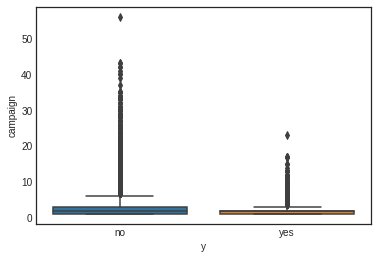

In [499]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="campaign")
plt.show()

From the above plot there are so many outliers are present for No class than yes class. Also it seems like this plot maynot be very helpful in predicting class variables. Lets plot kdplot with hue

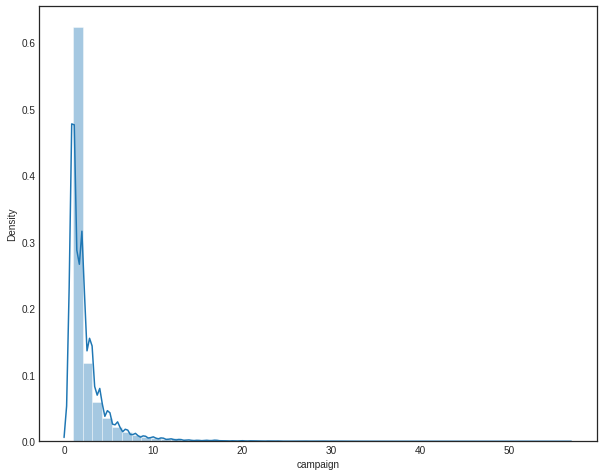

In [500]:
#%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df_bank["campaign"])
plt.show()

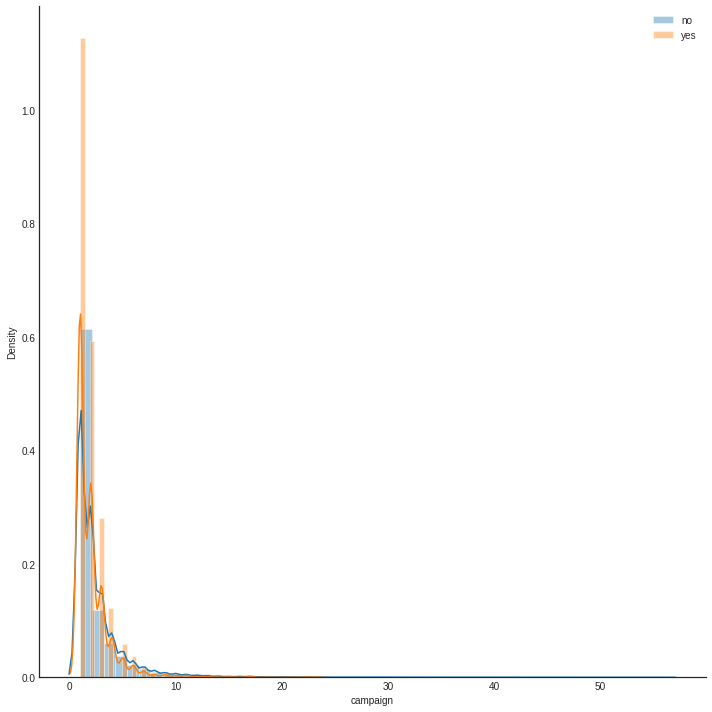

In [501]:
plotting_kd(df_bank,'campaign',hue='y')

 There is very much overlapping for both the classes.

###4. **pdays** 

1.   other campaign attributes:
2.    number of days that passed by after the client was last contacted from a previous campaign 


In [502]:
df_bankn['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [503]:
# General stats description of PDAYS
print (df_bankn.iloc[:,3].describe())
print(f"the median pdays is :", (statistics.median(df_bankn.iloc[:,3])))
print(f"the varaince of pdays is:",df_bankn.pdays.var())
print(f"the Skewness of pdays is:",scipy.stats.skew(df_bankn.pdays))
print(f"the Kurtosis of pdays is:",scipy.stats.kurtosis(df_bankn.pdays))

count    41188.000000
mean       962.475454
std        186.910907
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64
the median pdays is : 999.0
the varaince of pdays is: 34935.68728443533
the Skewness of pdays is: -4.922010656450045
the Kurtosis of pdays is: 22.2266185118177


In [504]:
df_bank["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Most of the values are 999, which means that the most of the customers have never been contacted before.

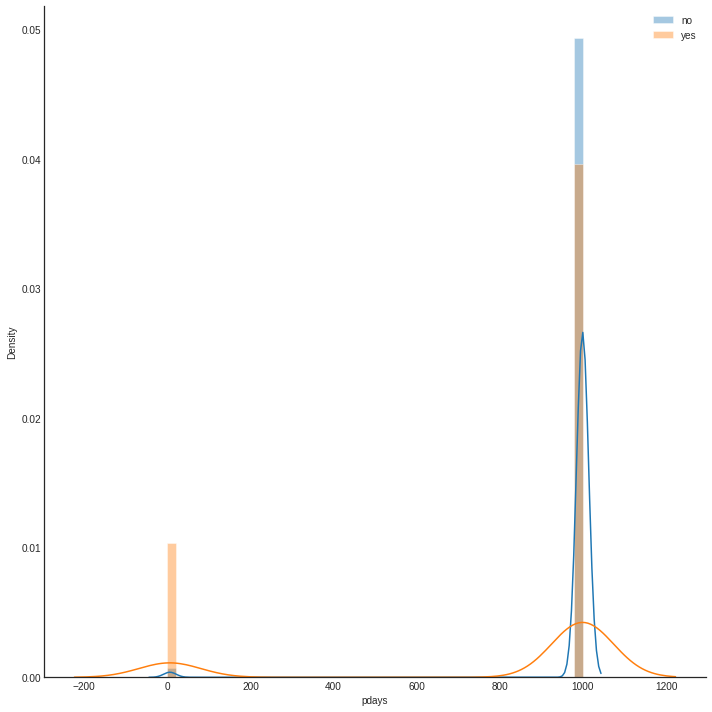

In [505]:
plotting_kd(df_bank,'pdays',hue='y')

Median: 6.0


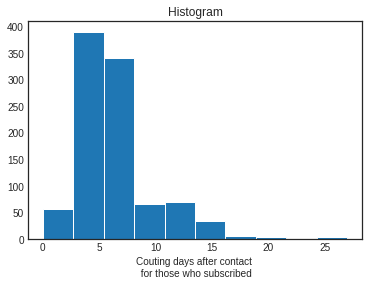

In [506]:
dummy = df_bank.loc[(df_bank['pdays']!=999) & (df_bank['target'] == 1), 'pdays']
print('Median: {:.2}'.format(dummy.median()))
dummy.hist().grid(False)
plt.title('Histogram')
plt.xlabel('Couting days after contact \n for those who subscribed');

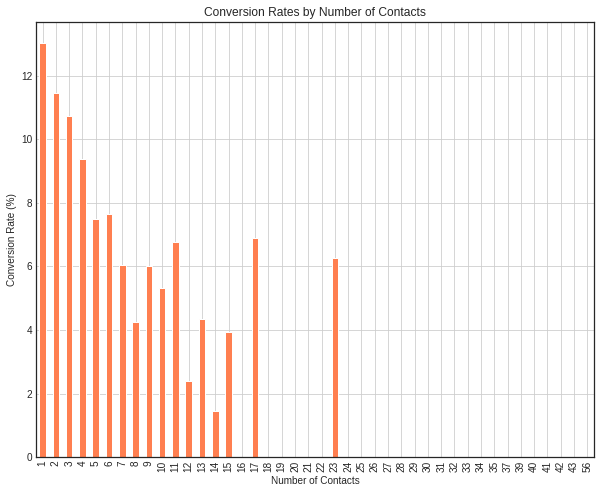

In [507]:
# Conversion rate by campaign
conversions_by_contacts = df_bankc.groupby('campaign')['converted'].sum() / df_bankc.groupby('campaign')['converted'].count() * 100.0
# Let's see the top ten campaigns in terms of % converted
conversions_by_contacts.head(10)
ax = conversions_by_contacts.plot(
    kind='bar',
    figsize=(10, 8),
    title='Conversion Rates by Number of Contacts',
    grid=True,
    color='coral'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('Conversion Rate (%)')

plt.show()

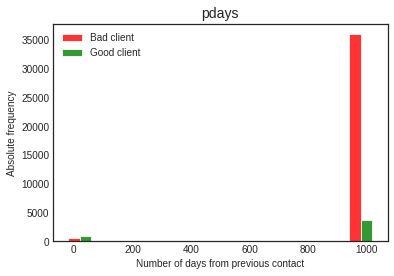

In [508]:
# Visualization variable vs. target
pdays_0 = df_bank[df_bank.target == 0].iloc[:,12:13]
pdays_1 = df_bank[df_bank.target == 1].iloc[:,12:13]

a = np.array(pdays_0)
b = np.array(pdays_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=False, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=25, density=False, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper left')
plt.title('pdays', fontsize=14)
plt.xlabel('Number of days from previous contact')
plt.ylabel('Absolute frequency')
plt.show()

Considering only the clients who had subscribed let's count the days that passed by after contact from a previous campaign. Most of the people will respond on the 6th day and within 8 days.

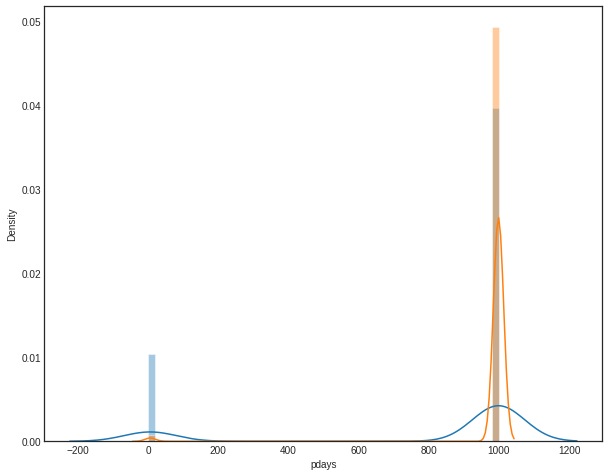

In [509]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df_bank[df_bank["y"]=="yes"]["pdays"])
sns.distplot(df_bank[df_bank["y"]=="no"]["pdays"])
plt.show()

###4. **previous**

*   other campaign attributes:
*   number of contacts performed before this campaign and for this client 



In [510]:
# General stats description of PREVIOUS
print (f"Key Stats of emp.var.rate:\n",df_bankn.iloc[:,4].describe(include='all'))
print(f"the median previous is :", (statistics.median(df_bankn.iloc[:,4])))
print(f"the varaince of previous is:",df_bankn.previous.var())
print(f"the Skewness of previous is:",scipy.stats.skew(df_bankn.previous))
print(f"the Kurtosis of previous is:",scipy.stats.kurtosis(df_bankn.previous))


Key Stats of emp.var.rate:
 count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64
the median previous is : 0.0
the varaince of previous is: 0.24492707882612333
the Skewness of previous is: 3.8319026847007014
the Kurtosis of previous is: 20.106229526902816


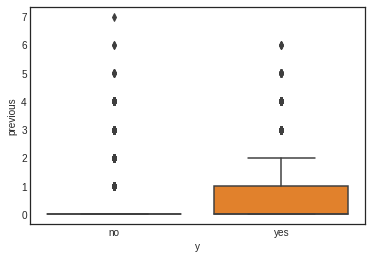

In [511]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="previous")
plt.show()

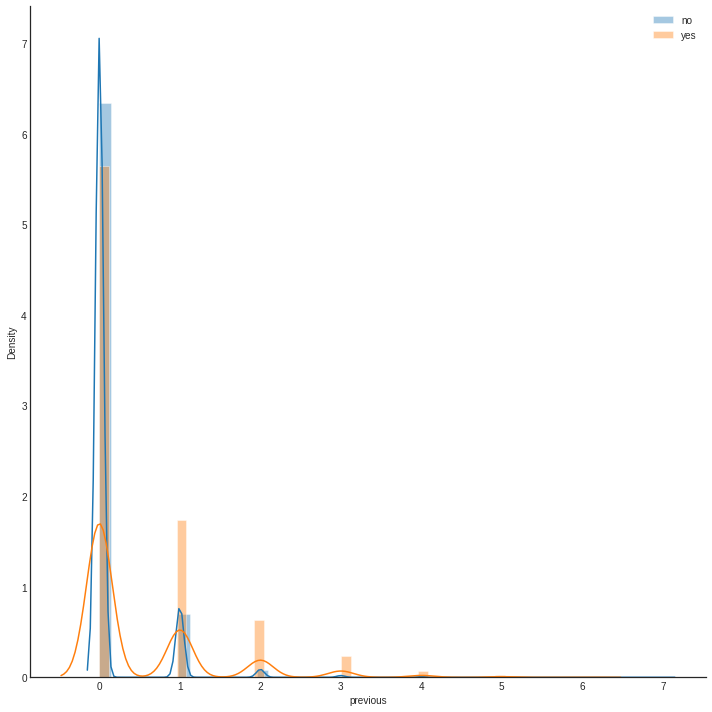

In [512]:
plotting_kd(df_bank,'previous',hue='y')

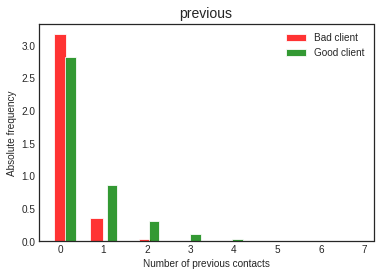

In [513]:
# Visualization variable vs. target
previous_0 = df_bank[df_bank.target == 0].iloc[:,13:14]
previous_1 = df_bank[df_bank.target == 1].iloc[:,13:14]

a = np.array(previous_0)
b = np.array(previous_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client', align="left")
plt.hist(b, bins=25, density=True, color="g", alpha = 0.8, label='Good client', align="right")
plt.legend(loc='upper right')
plt.title('previous', fontsize=14)
plt.xlabel('Number of previous contacts')
plt.ylabel('Absolute frequency')
plt.show()

How many people were previously contacted? ................. 5625
How many people were never re-contacted 1 times? .................... 35563
How many people were contacted atleast 1 times? .................... 4561
How many people were previously contacted with sucess? ..... 4252
How many people were previously contacted with failure? .... 1373


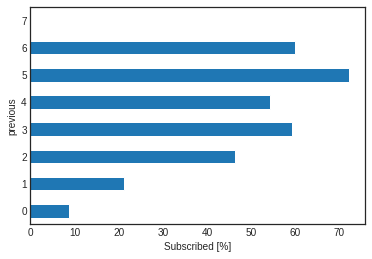

In [514]:
group = df_bank.groupby(['previous'])['target'].mean().multiply(100)
group.plot.barh()
plt.xlabel('Subscribed [%]');

print('How many people were previously contacted? ................. {}'.format(df_bank.loc[df_bank['previous']!=0].shape[0]))
print('How many people were never re-contacted 1 times? .................... {}'.format(df_bank.loc[df_bank['previous']==0, 'previous'].count()))
print('How many people were contacted atleast 1 times? .................... {}'.format(df_bank.loc[df_bank['previous']==1, 'previous'].count()))
print('How many people were previously contacted with sucess? ..... {}'.format(df_bank.poutcome.value_counts()[1]))
print('How many people were previously contacted with failure? .... {}'.format(df_bank.poutcome.value_counts()[2]))

People that were previously contacted subscribed in a much higher rate to the term deposit.

While in people never contacted only 10% subscribed to the deposit, for people that was previously contacted more than twice the campaign success increases to >45%.

**Indexes variables**

There are 4 macro rating variables, or economic indexes, present in the dataset. Let's digg a bit further and breafly investigate their correlation and check if there are any trends of patterns between those indexes and also with each other against the target. Let's create a list only with these specific variables and display them side by side (pairplot method).

In [515]:
# creating numeric indexes

idx_list = ["cons.price.idx","cons.conf.idx","euribor3m","emp.var.rate","target"]
df_bank[idx_list].corr()

,cons.price.idx,cons.conf.idx,euribor3m,emp.var.rate,target
cons.price.idx,1.000000,0.058986,0.688230,0.775334,-0.136211
cons.conf.idx,0.058986,1.000000,0.277686,0.196041,0.054878
euribor3m,0.688230,0.277686,1.000000,0.972245,-0.307771
emp.var.rate,0.775334,0.196041,0.972245,1.000000,-0.298334
target,-0.136211,0.054878,-0.307771,-0.298334,1.000000


We can clearly see that euribor3m,cons_price_idx, nr.employed and emp_Var_rate are highly correlated.

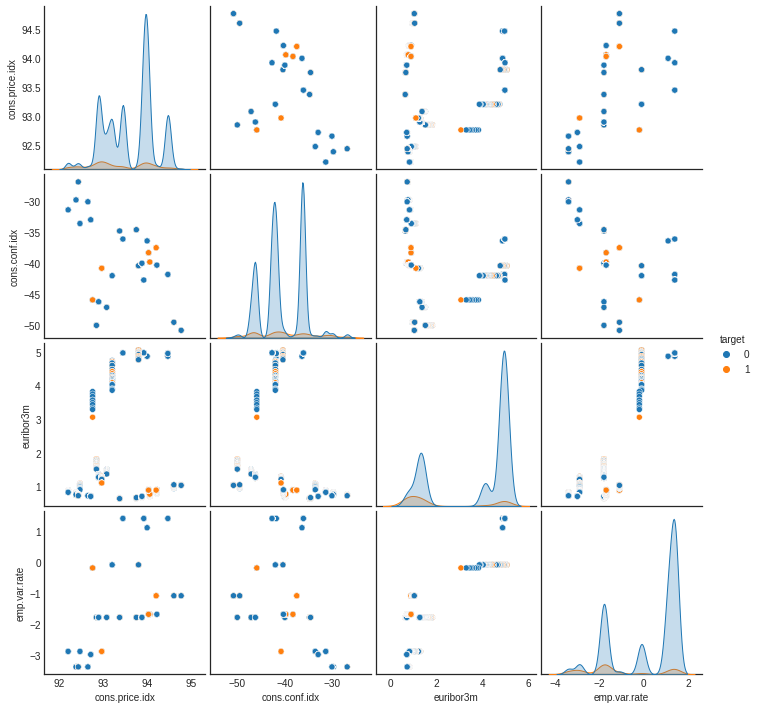

In [516]:
# Visualization of indexes variables' correlations (pairplot)
sns.pairplot(df_bank[idx_list], hue="target")
plt.show()

What can we observe from the scatter plots? Please keep in mind that (blue) 0=NO and (orange) 1=YES

* euribor3m increases when there is a positive variation of emp_var_rate 
* cons_conf_idxvarys linearly with cons_price_idx and emp_var_rate: the higher the prices and rate of employment gets, the lower the confidance level index becomes;
* when emp_var_rate (employment rate) increases, cons_price_idx (price index) increases as well

Can the output of the campaign be affected by the indexes variables? The answer comes from the observation of the distribution plots.

* the lower the euribor3mis, the higher the amount of subscriptions
* when the cons_price_idx(consumer price index) increases there is a strong negative response from the clients' subscriptions
* when the emp_var_rate (employment rate) is negative, there is a higher positive response to the campaign. Feature importance will be study later and we'll have the opportunity to clarify these apparent inconsistences

###6. **emp.var.rate**        

1.   social and economic context attributes
2.   employment variation rate - quarterly indicator 



In [517]:
# General stats description of EMP.VAR.RATE
print (f"Key Stats of emp.var.rate:\n",df_bankn.iloc[:,5].describe(include='all'))
print(f"the median emp.var.rate is :", (statistics.median(df_bankn.iloc[:,5])))
print(f"the varaince of emp.var.rate is:",(statistics.variance(df_bankn.iloc[:,5])))
print(f"the Std Var of emp.var.rate is:",(statistics.stdev(df_bankn.iloc[:,5])))
print(f"the Skewness of emp.var.rate is:",(scipy.stats.skew(df_bankn.iloc[:,5])))
print(f"the Kurtosis of emp.var.rate is:",(scipy.stats.skew(df_bankn.iloc[:,5])))


Key Stats of emp.var.rate:
 count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64
the median emp.var.rate is : 1.1
the varaince of emp.var.rate is: 2.4679145063253203
the Std Var of emp.var.rate is: 1.5709597405170255
the Skewness of emp.var.rate is: -0.7240691785977529
the Kurtosis of emp.var.rate is: -0.7240691785977529


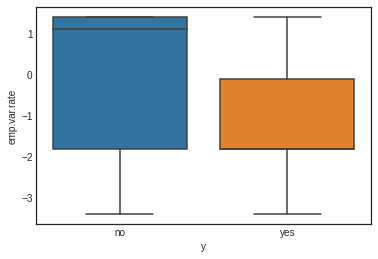

In [518]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="emp.var.rate")
plt.show()

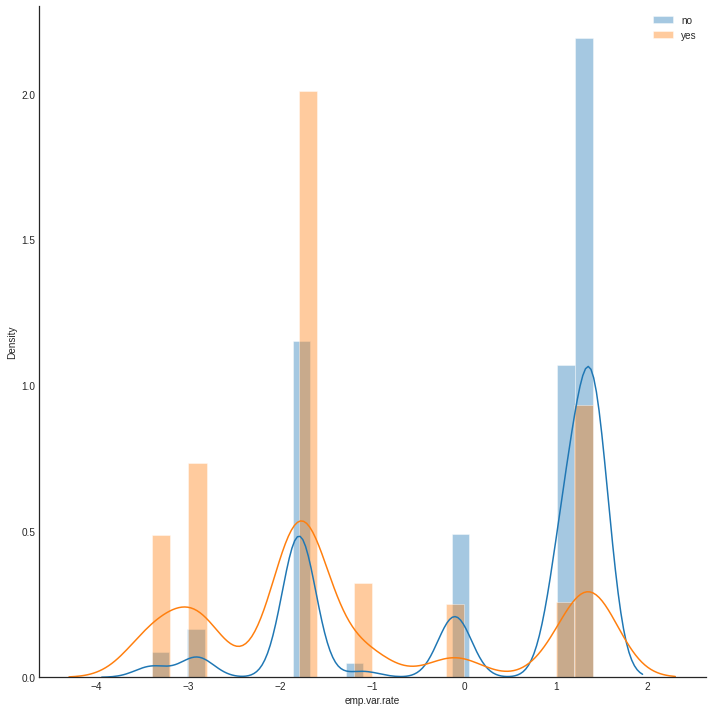

In [519]:
plotting_kd(df_bank,'emp.var.rate',hue='y')

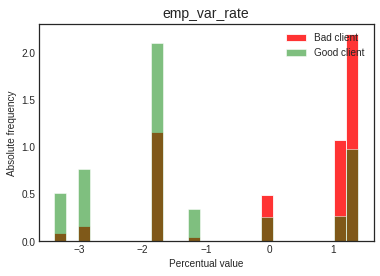

In [520]:
# Visualization of variable vs. target
emp_var_rate_0 = df_bank[df_bank.target == 0].iloc[:,15:16]
emp_var_rate_1 = df_bank[df_bank.target == 1].iloc[:,15:16]

a = np.array(emp_var_rate_0)
b = np.array(emp_var_rate_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper right')
plt.title('emp_var_rate', fontsize=14)
plt.xlabel('Percentual value')
plt.ylabel('Absolute frequency');

###7. **cons.price.idx**     

*   social and economic context attributes
*   consumer price index - monthly indicator 



In [521]:
# General stats description of cons.price.idx
print (f"Key Stats cons.price.idx:\n",df_bankn.iloc[:,6].describe(include='all'))
print(f"the median cons.price.idx is :", (statistics.median(df_bankn.iloc[:,6])))
print(f"the varaince of cons.price.idx is:",(statistics.variance(df_bankn.iloc[:,6])))
print(f"the Std Var of cons.price.idx is:",(statistics.stdev(df_bankn.iloc[:,6])))
print(f"the Skewness of cons.price.idx is:",(scipy.stats.skew(df_bankn.iloc[:,6])))
print(f"the Kurtosis of cons.price.idx is:",(scipy.stats.skew(df_bankn.iloc[:,6])))

Key Stats cons.price.idx:
 count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64
the median cons.price.idx is : 93.749
the varaince of cons.price.idx is: 0.3350558022732152
the Std Var of cons.price.idx is: 0.5788400489541262
the Skewness of cons.price.idx is: -0.23087924271991117
the Kurtosis of cons.price.idx is: -0.23087924271991117


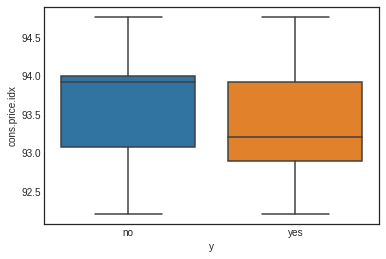

In [522]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="cons.price.idx")
plt.show()

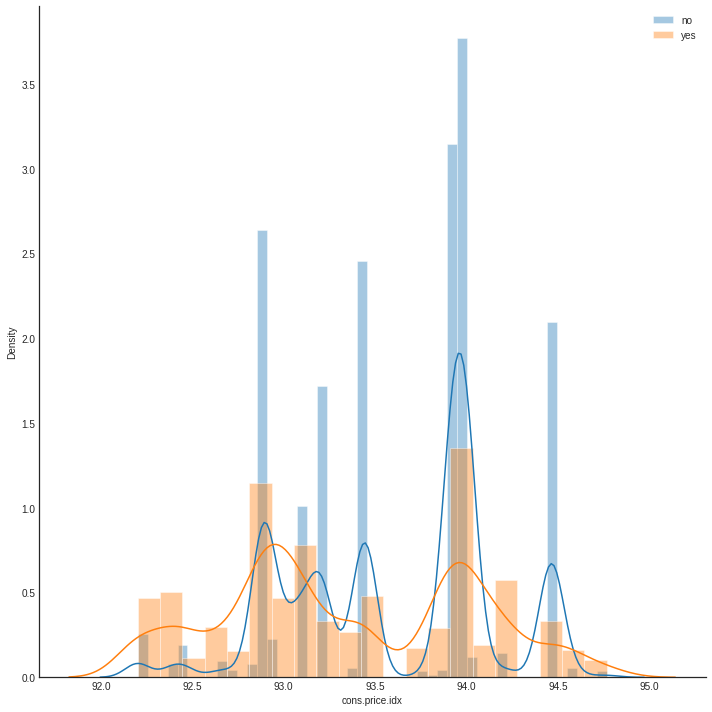

In [523]:
plotting_kd(df_bank,'cons.price.idx',hue='y')

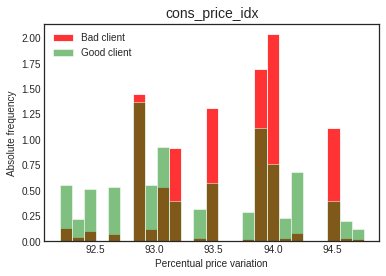

In [524]:
# Visualization of variable vs. target
cons_price_idx_0 = df_bank[df_bank.target == 0].iloc[:,16:17]
cons_price_idx_1 = df_bank[df_bank.target == 1].iloc[:,16:17]

a = np.array(cons_price_idx_0)
b = np.array(cons_price_idx_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.8, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('cons_price_idx', fontsize=14)
plt.xlabel('Percentual price variation')
plt.ylabel('Absolute frequency');

###8. **cons.conf.idx**      

*   social and economic context attributes
*   consumer confidence index - monthly indicator 



In [525]:
# General stats description of cons.conf.idx
print (f"Key Stats of cons.conf.idx:\n",df_bankn.iloc[:,7].describe(include='all'))
print(f"the median cons.conf.idx is :", (statistics.median(df_bankn.iloc[:,7])))
print(f"the varaince of cons.conf.idx is:",(statistics.variance(df_bankn.iloc[:,7])))
print(f"the Std Var of cons.conf.idx is:",(statistics.stdev(df_bankn.iloc[:,7])))
print(f"the Skewness of cons.conf.idx is:",(scipy.stats.skew(df_bankn.iloc[:,7])))
print(f"the Kurtosis of cons.conf.idx is:",(scipy.stats.skew(df_bankn.iloc[:,7])))

Key Stats of cons.conf.idx:
 count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64
the median cons.conf.idx is : -41.8
the varaince of cons.conf.idx is: 21.42021539589864
the Std Var of cons.conf.idx is: 4.628197856174544
the Skewness of cons.conf.idx is: 0.3031688173189229
the Kurtosis of cons.conf.idx is: 0.3031688173189229


In [526]:
#Crosstab to display default stats with respect to y  class variable
pd.crosstab(index=df_bank["cons.conf.idx"], columns=df_bank["y"])

y,no,yes
cons.conf.idx,,
-50.8,70,58
-50.0,156,126
-49.5,111,93
-47.1,2016,442
-46.2,5270,524
-45.9,9,1
-42.7,6278,407
-42.0,3426,190
-41.8,4186,188


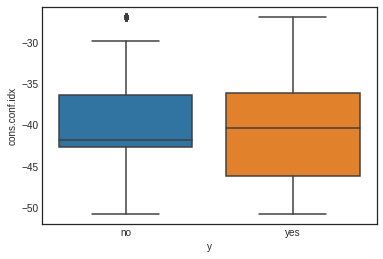

In [527]:
sns.boxplot(data=df_bank, x="y", y="cons.conf.idx")

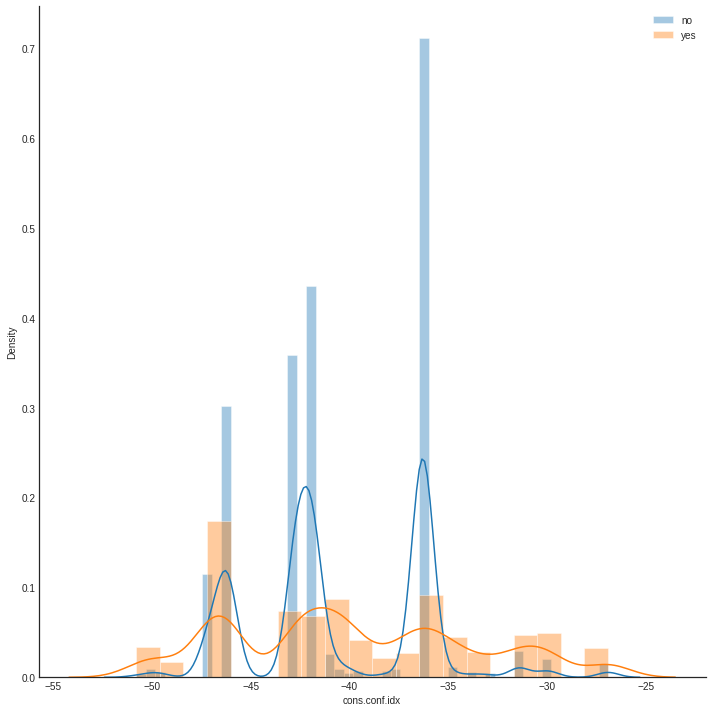

In [528]:
plotting_kd(df_bank,'cons.conf.idx',hue='y')

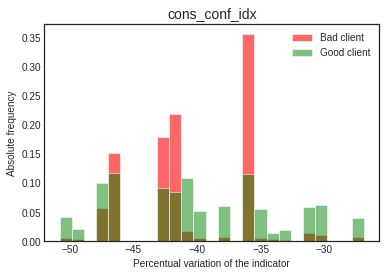

In [529]:
# Visualization of variable vs. target
cons_conf_idx_0 = df_bank[df_bank.target == 0].iloc[:,17:18]
cons_conf_idx_1 = df_bank[df_bank.target == 1].iloc[:,17:18]

a = np.array(cons_conf_idx_0)
b = np.array(cons_conf_idx_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper right')
plt.title('cons_conf_idx', fontsize=14)
plt.xlabel('Percentual variation of the indicator')
plt.ylabel('Absolute frequency');

###9. **euribor3m**

*   social and economic context attributes
*   euribor 3 month rate - daily indicator





In [530]:
# General stats description of nr.employed
print (f"Key Stats of euribor3m:\n",df_bankn.iloc[:,8].describe(include='all'))
print(f"the median euribor3m is :", (statistics.median(df_bankn.iloc[:,8])))
print(f"the varaince of euribor3m is:",(statistics.variance(df_bankn.iloc[:,8])))
print(f"the Std Var of euribor3m is:",(statistics.stdev(df_bankn.iloc[:,8])))
print(f"the Skewness of euribor3m is:",(scipy.stats.skew(df_bankn.iloc[:,8])))
print(f"the Kurtosis of euribor3m is:",(scipy.stats.skew(df_bankn.iloc[:,8])))

Key Stats of euribor3m:
 count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64
the median euribor3m is : 4.857
the varaince of euribor3m is: 3.0083078001952943
the Std Var of euribor3m is: 1.7344474048512668
the Skewness of euribor3m is: -0.7091621286441162
the Kurtosis of euribor3m is: -0.7091621286441162


In [531]:
#Crosstab to display default stats with respect to y  class variable
pd.crosstab(index=df_bank["euribor3m"], columns=df_bank["y"])

y,no,yes
euribor3m,,
0.634,2,6
0.635,21,22
0.636,11,3
0.637,1,5
0.638,2,5
...,...,...
4.967,610,33
4.968,935,57
4.970,168,4


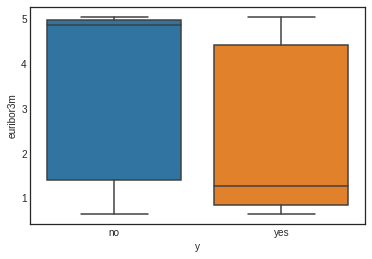

In [532]:
sns.boxplot(data=df_bank, x="y", y="euribor3m")

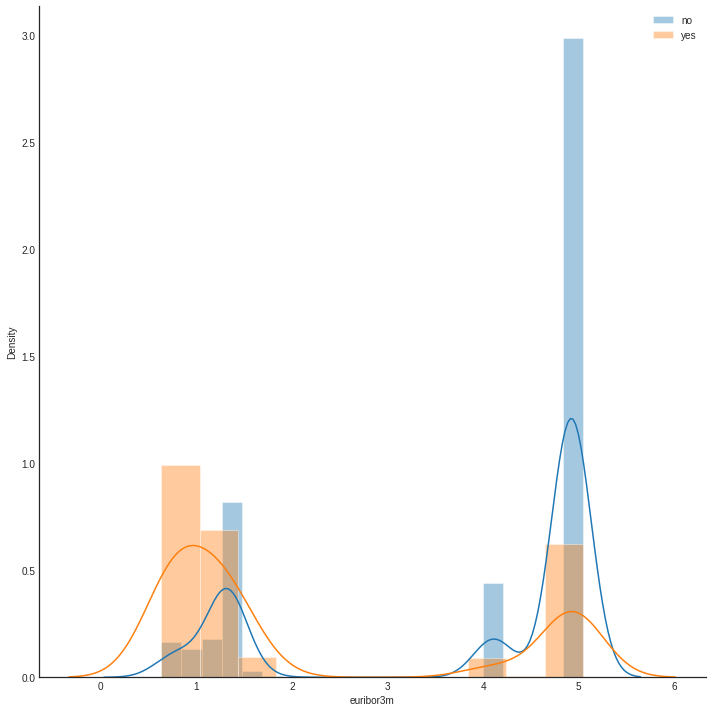

In [533]:
plotting_kd(df_bank,'euribor3m',hue='y')

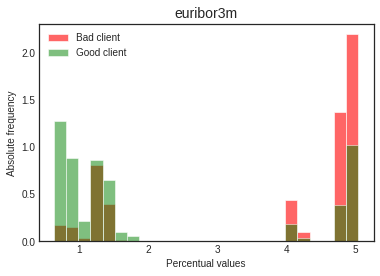

In [534]:
# Visualization of variable vs. target
euribor3m_0 = df_bank[df_bank.target == 0].iloc[:,18:19]
euribor3m_1 = df_bank[df_bank.target == 1].iloc[:,18:19]

a = np.array(euribor3m_0)
b = np.array(euribor3m_1)

np.warnings.filterwarnings('ignore')

plt.hist(a, bins=25, density=True, color="r", alpha = 0.6, label='Bad client')
plt.hist(b, bins=25, density=True, color="g", alpha = 0.5, label='Good client')
plt.legend(loc='upper left')
plt.title('euribor3m', fontsize=14)
plt.xlabel('Percentual values')
plt.ylabel('Absolute frequency');

###10. **nr.employed** 

*   social and economic context attributes
*   number of employees - quarterly indicator

In [535]:
print (f"Key Stats:\n",df_bankn.iloc[:,9].describe(include='all'))
print(f"the median nr.employed is :", (statistics.median(df_bankn.iloc[:,9])))
print(f"the varaince of nr.employed is:",(statistics.variance(df_bankn.iloc[:,9])))
print(f"the Std Var of nr.employed is:",(statistics.stdev(df_bankn.iloc[:,9])))
print(f"the Skewness of nr.employed is:",(scipy.stats.skew(df_bankn.iloc[:,9])))
print(f"the Kurtosis of nr.employed is:",(scipy.stats.skew(df_bankn.iloc[:,9])))


Key Stats:
 count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64
the median nr.employed is : 5191.0
the varaince of nr.employed is: 5220.283250397494
the Std Var of nr.employed is: 72.25152766826106
the Skewness of nr.employed is: -1.0442243763652297
the Kurtosis of nr.employed is: -1.0442243763652297


In [536]:
#Crosstab to display default stats with respect to y  class variable
pd.crosstab(index=df_bank["nr.employed"], columns=df_bank["y"])

y,no,yes
nr.employed,,
4963.6,334,301
4991.6,370,403
5008.7,281,369
5017.5,617,454
5023.5,84,88
5076.2,1069,594
5099.1,7442,1092
5176.3,9,1
5191.0,7523,240


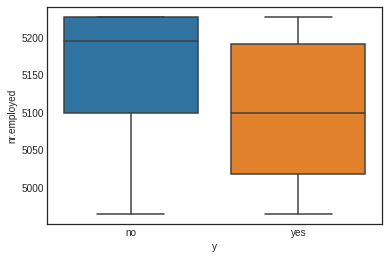

In [537]:
sns.boxplot(data=df_bank, x="y", y="nr.employed")
     

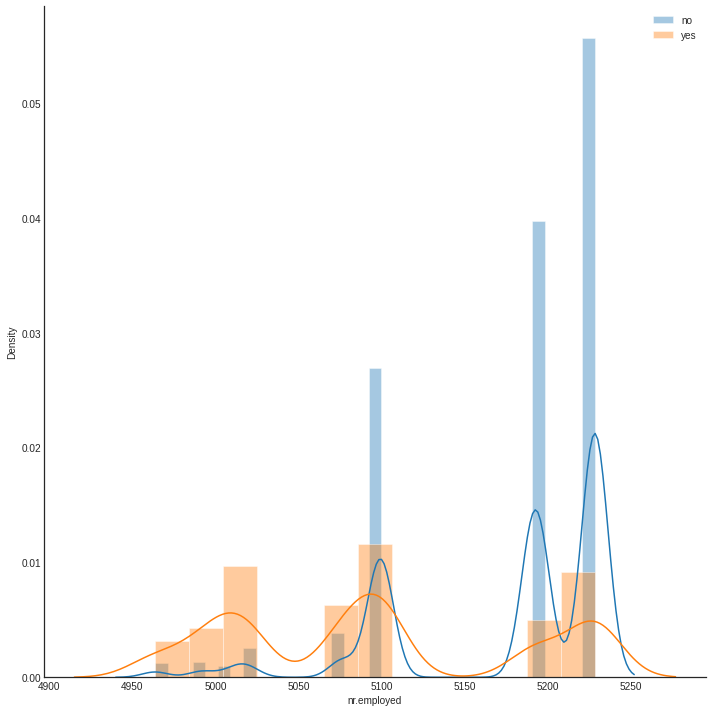

In [538]:
plotting_kd(df_bank,'nr.employed',hue='y')

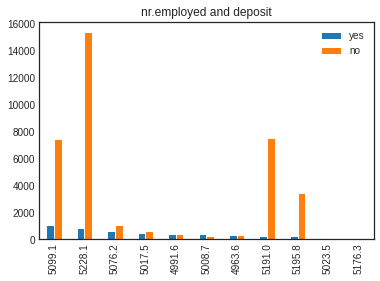

In [539]:
#Visualization of relationship between feature category vs dependent variable y
#nr.employed and deposit
j_bank = pd.DataFrame()

j_bank['yes'] = df_bank[df_bank['y'] == 'yes']['nr.employed'].value_counts()
j_bank['no'] = df_bank[df_bank['y'] == 'no']['nr.employed'].value_counts()

j_bank.plot.bar(title = 'nr.employed and deposit')

From this plot nr.employed would also be very much helpful in predicting class labels.

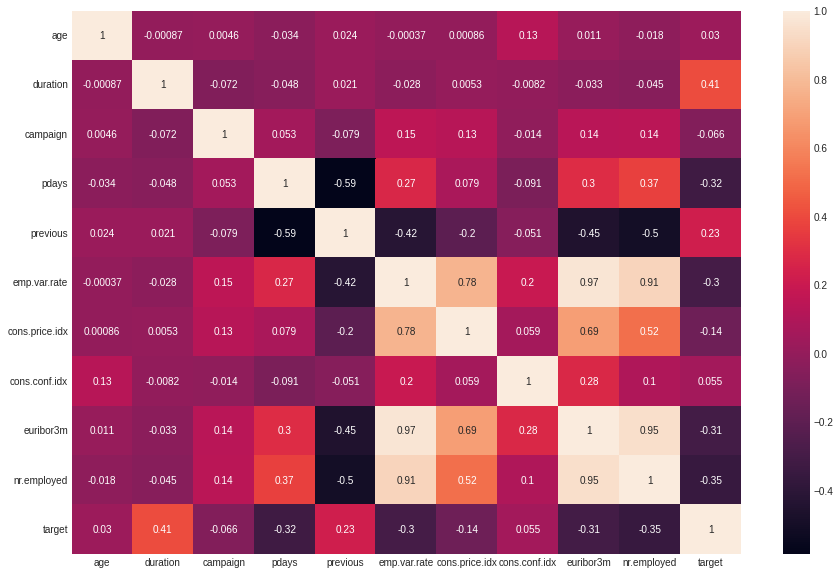

In [540]:
def plotting_heatmap(df_bank):
    correlation=df_bankn.corr()
    figure(figsize=(15,10))
        
        
    sns.heatmap(correlation, annot=True)
    
plotting_heatmap(df_bank)

**The emp.var.rate, euribor3m, nr.employed and cons.price.index have very high correlation. Euribor3m with nr.employed and emp.var.rate with nr.employed with the highest correlation with more than 0.9 value.**

#**Categorical Varaiable**

In [541]:
df_label = df_bank.select_dtypes(include = np.object)
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [542]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = df_bank[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [543]:
%matplotlib inline

def countplot_withY(label, dataset ):
  plt.figure(figsize=(20,10))
  Y = df_bank[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df_bank, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [544]:
def countplot(label, dataset):
  plt.figure(figsize=(15,10))
  Y = df_bank[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=df_bank)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

###Check number of unique values for each feature

In [545]:
df_label.nunique()

job            12
marital         4
education       8
default         3
housing         3
loan            3
contact         2
month          10
day_of_week     5
poutcome        3
y               2
dtype: int64

### What are the most common categories?

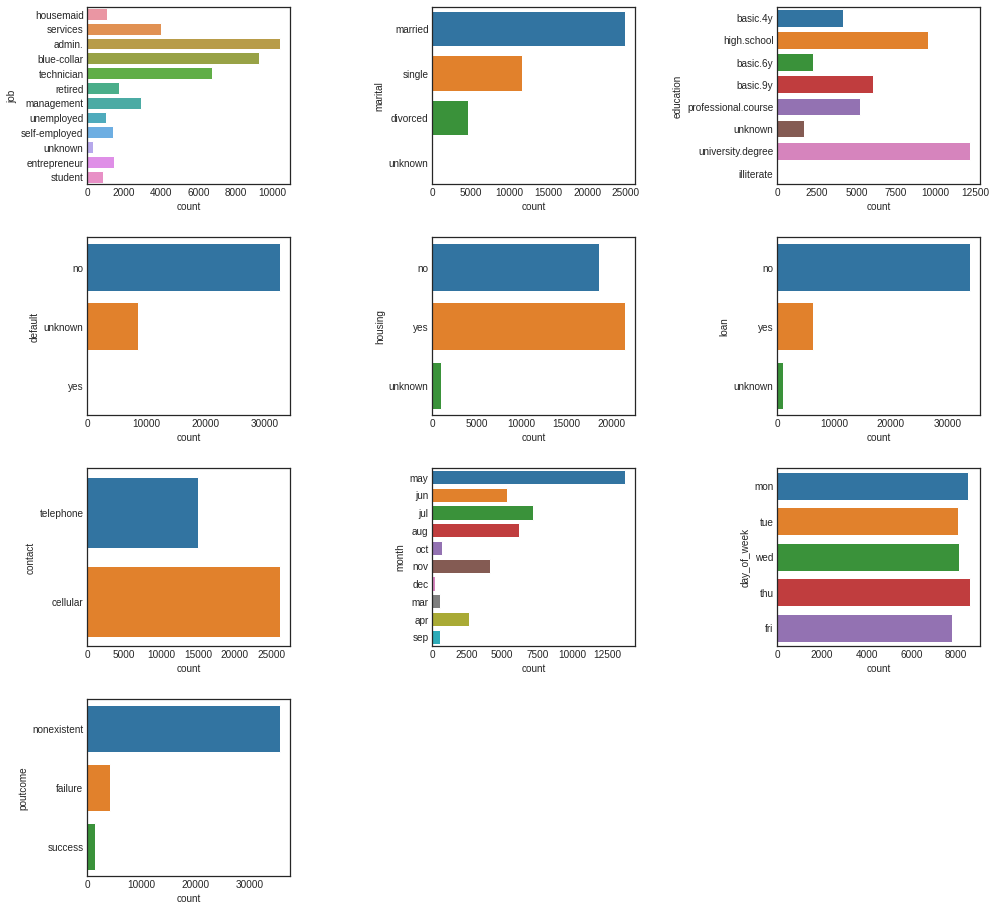

In [546]:
categorical_vars = df_bank.describe(include=["object"]).columns
# Count plots of categorical variables

fig, axes = plt.subplots(4, 3, figsize=(16, 16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.3)

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.countplot(y = categorical_vars[i], data=df_bank, ax=ax)

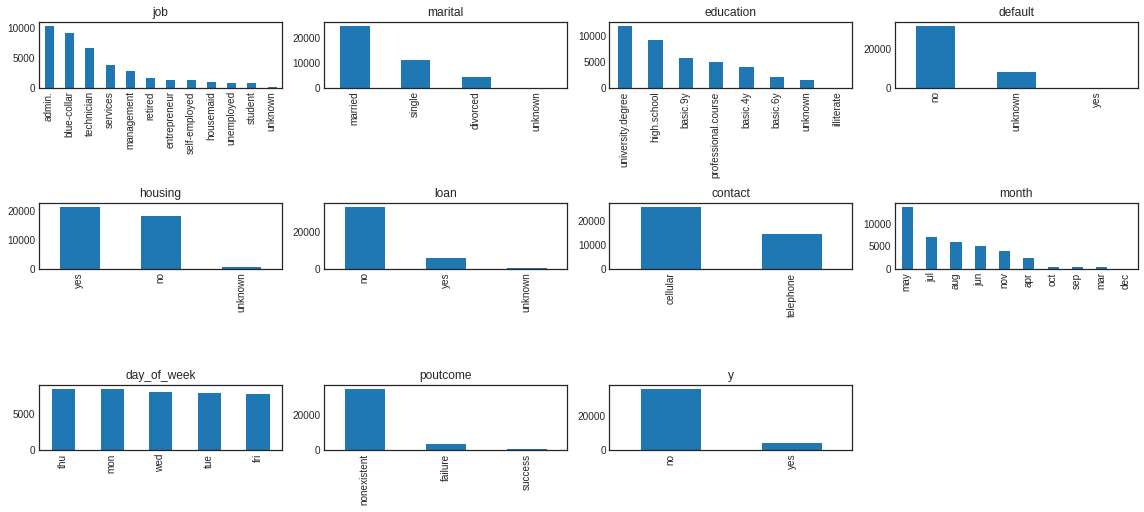

In [547]:
n = len(cat_features)
i=1
plt.figure(figsize=(16,14))

for feature in df_bank[cat_features]:
    plt.subplot(round(n/2),round(n/3), i)
    df_bank[feature].value_counts().plot.bar()
    plt.xticks(rotation=90)
    plt.title(feature)
    i+=1

plt.tight_layout();


Most common:

* job: administrative
* marital state: married
* education: university degree
* credit in defaut: no
* housing: yes, however does not have house is very close
* loan: no
* poutcome: did not participate in previous campaign

Notice that all the feature includes that category 'unknown' except for the * 'poutcome' variable.

### How these categories influence the target variable?

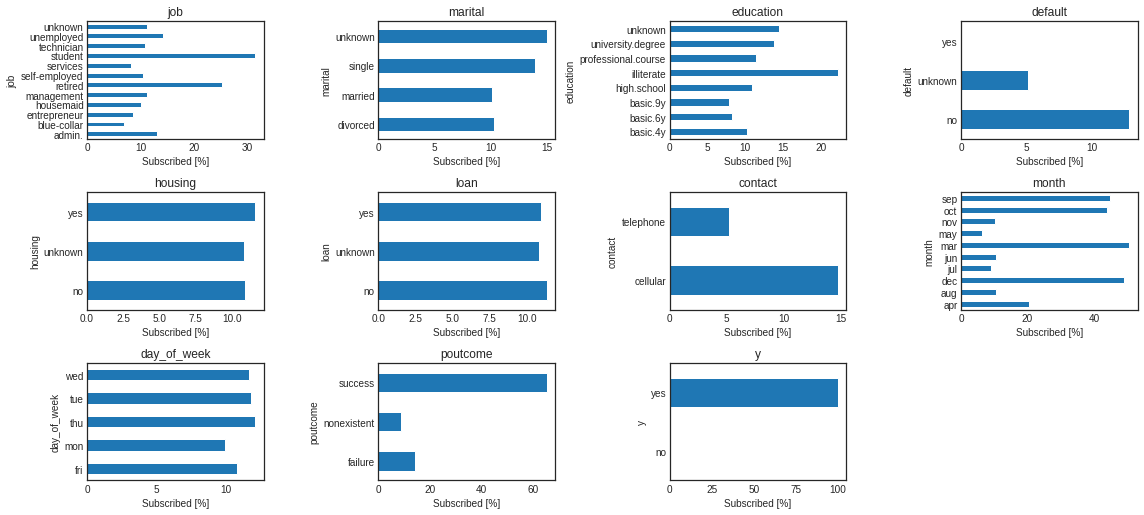

In [548]:
# How these categories influence the target variable?

n = len(cat_features)
i=1
plt.figure(figsize=(16,14))

for feature in df_bank[cat_features]:
    plt.subplot(round(n/2),round(n/3), i)
    df_bank.groupby([feature])['target'].mean().multiply(100).plot.barh()
    plt.xlabel('Subscribed [%]')
    plt.title(feature)
    i+=1

plt.tight_layout()
plt.show()

###  **JOB**

*    Personal Attributes
*    type of job 

In [549]:
print(f"List of unique values: {df_bank.job.unique()}")

List of unique values: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [550]:
#Count of Job,
for x in ["job"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

                 job
admin.         10422
blue-collar     9254
entrepreneur    1456
housemaid       1060
management      2924
retired         1720
self-employed   1421
services        3969
student          875
technician      6743
unemployed      1014
unknown          330


In [551]:
#Crosstab to display job stats with respect to y  class variable
pd.crosstab(index=df_bank["job"], columns=df_bank["y"])

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


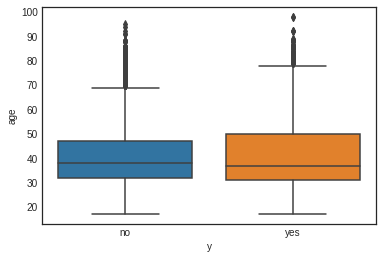

In [552]:
%matplotlib inline
sns.boxplot(data=df_bank, x="y", y="age")
plt.show()

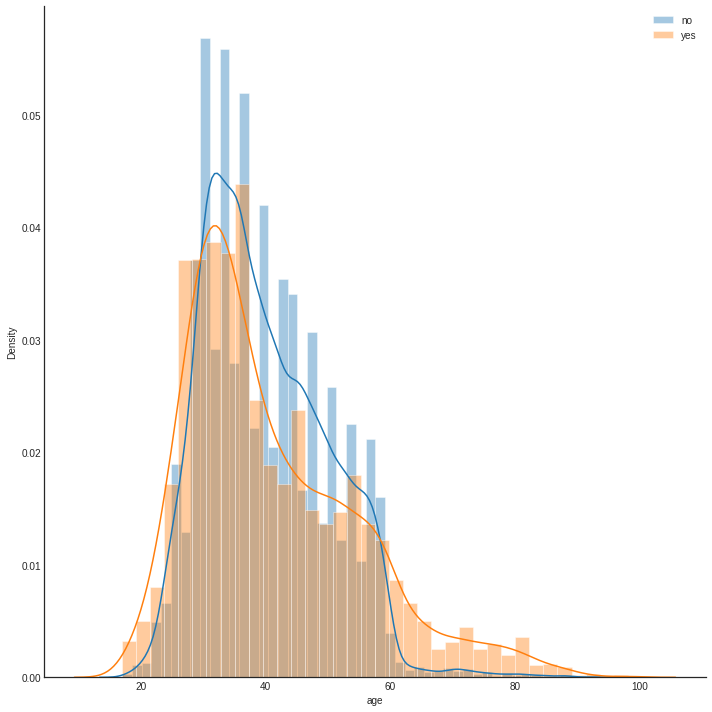

In [553]:
plotting_kd(df_bank,'age',hue='y')

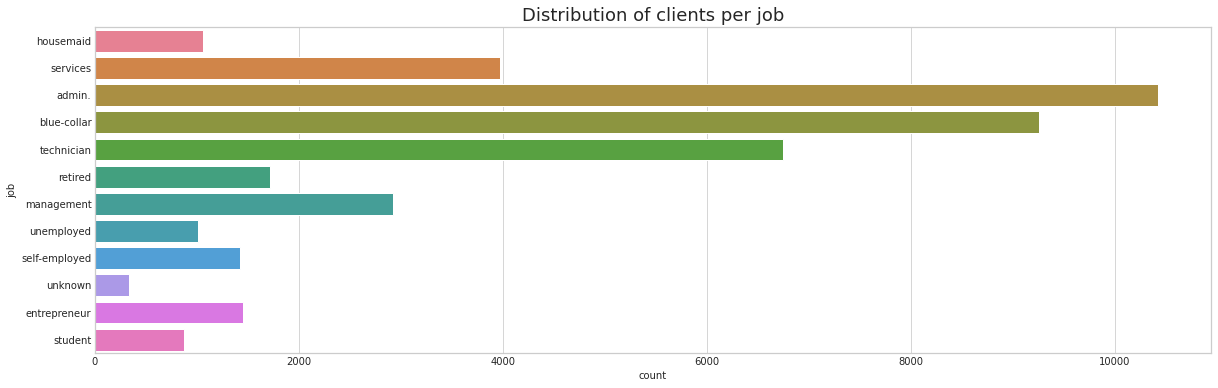

In [554]:
#Let's see the distribution of clients per job.
sns.set_style('whitegrid')
plt.figure(figsize=(20, 6))
plt.title("Distribution of clients per job", fontsize=18)
sns.countplot(y="job", data=df_bank, palette='husl')
#countplot_withY("job", df_bank);

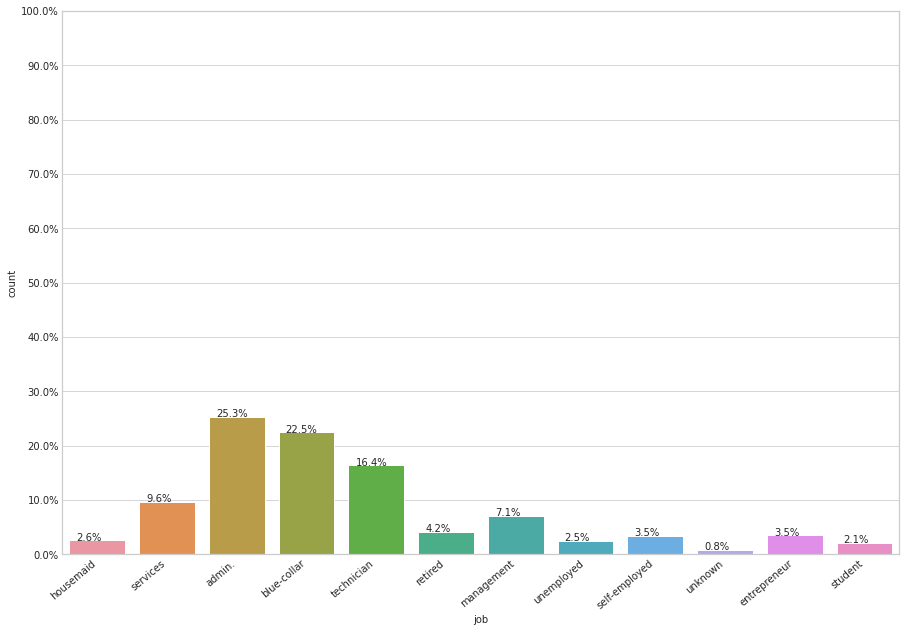

In [555]:
countplot("job", df_bank)

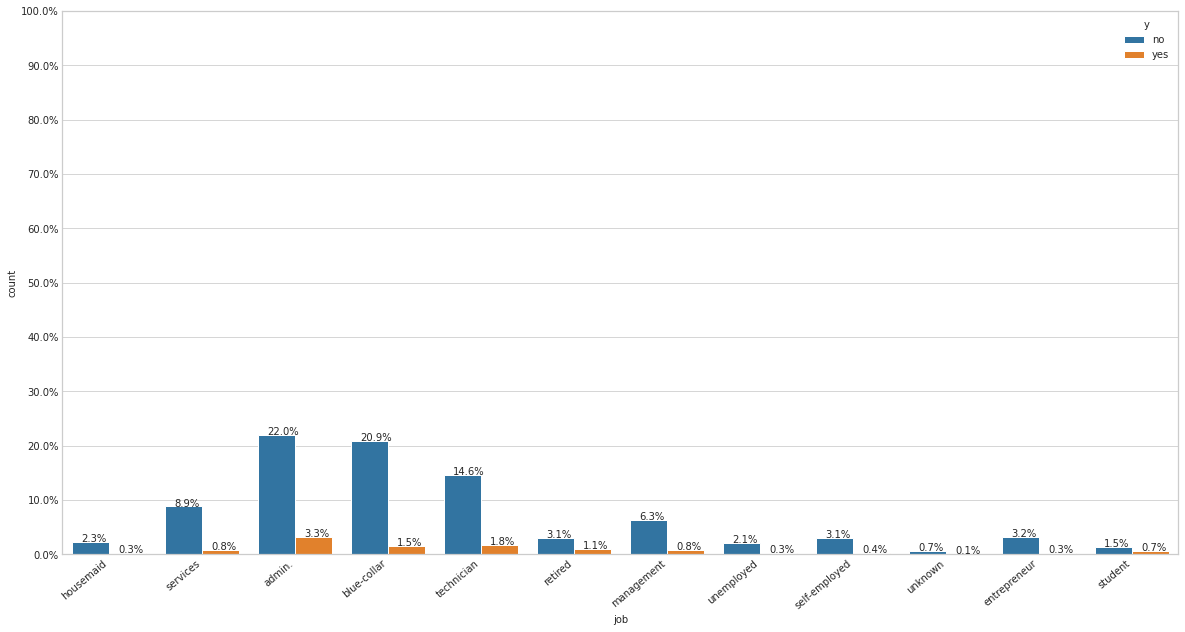

In [556]:
#countplot("job", df_bank)
countplot_withY("job",  df_bank)

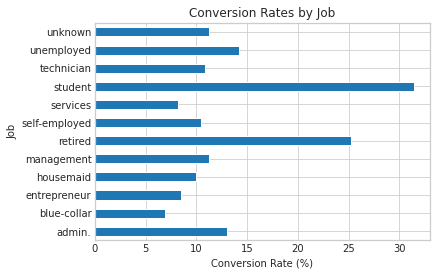

In [557]:
# How about conversion rate by job?
conversion_rate_by_job = df_bankc.groupby(by='job')['converted'].sum() / df_bankc.groupby(by='job')['converted'].count() * 100.0
ax = conversion_rate_by_job.plot(kind='barh', grid=True, title='Conversion Rates by Job')

ax.set_xlabel('Conversion Rate (%)')
ax.set_ylabel('Job')

plt.show()

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

We can find out the odds or ratio of subscribing and not subscribing based on the profession, to find out which profession has the highest odds of subscribing given the data. At this point we are not sure if there is any correlation between job and target variable.

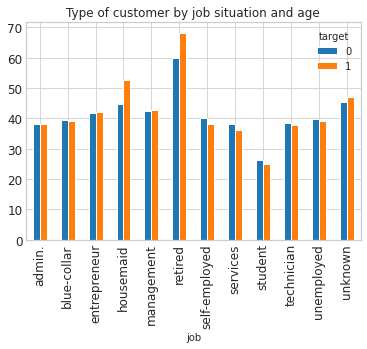

In [558]:
# Graph: Type of customer by marital situation and age
# Pivot_table
type_pivot = df_bank.pivot_table(
    columns="target",
    index="job",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["job"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by job situation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

### **Marital**

*   Personal Attributes
*    marital status 



In [559]:
#Count of Marital
for x in ["marital"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

          marital
divorced     4612
married     24928
single      11568
unknown        80


In [560]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["marital"], columns=df_bank["y"])

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


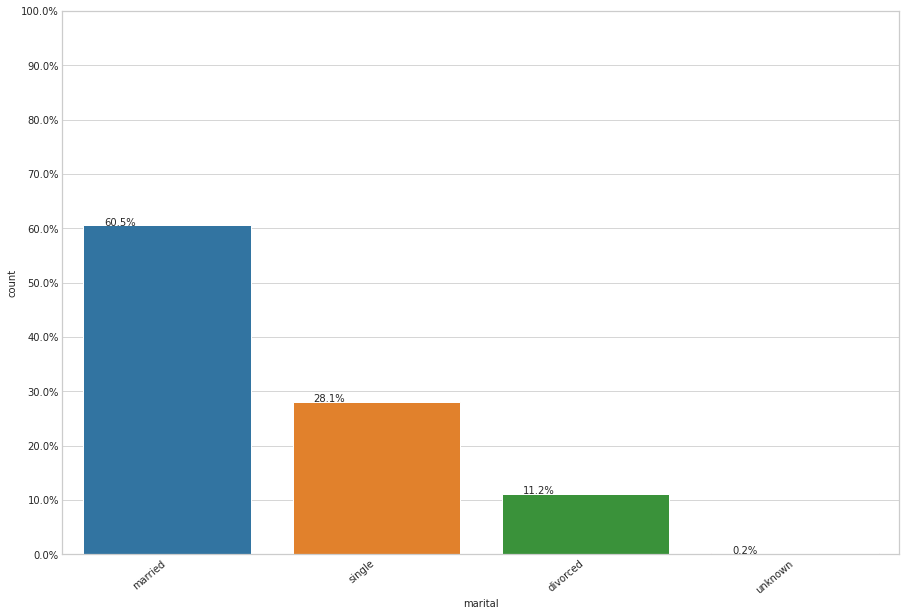

In [561]:
countplot("marital", df_bank)

From the above plot customer who has been contacted most are married. About 0.2% of marital status of customer is unknown.

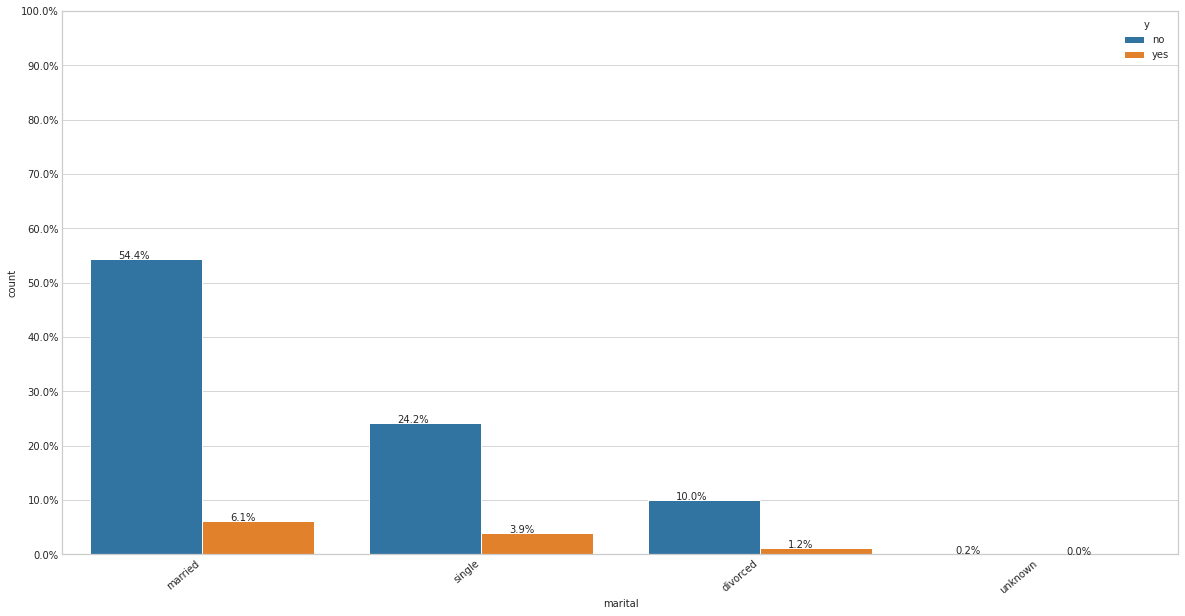

In [562]:
countplot_withY("marital",  df_bank)

From the above plot we can see that married people has subscribed to long term deposits more than any other. People whose status is unknown has not subscribed to the long term deposits at all

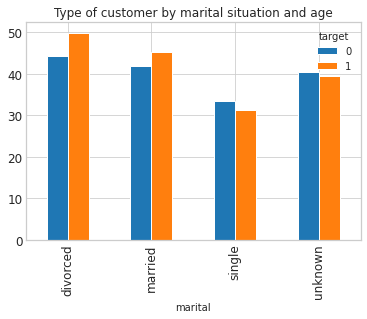

In [563]:
# Graph: Type of customer by marital situation and age
# Pivot_table
type_pivot = df_bank.pivot_table(
    columns="target",
    index="marital",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["marital"], 
                       ascending=True).plot(kind="bar", 
                                             title=("Type of customer by marital situation and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

### **Education**

*   Personal Attributes
*   level of education



In [564]:
#Count of Default
for x in ["education"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

                     education
basic.4y                  4176
basic.6y                  2292
basic.9y                  6045
high.school               9515
illiterate                  18
professional.course       5243
university.degree        12168
unknown                   1731


In [565]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["education"], columns=df_bank["y"])

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


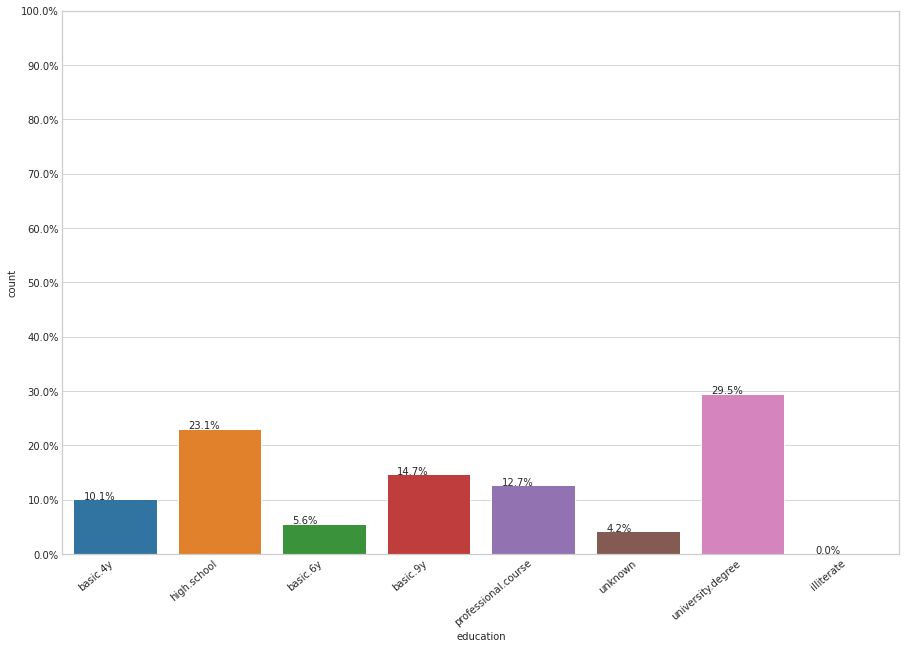

In [566]:
countplot("education", df_bank)

Customers who has been contacted are mostly completed university degree then followed by high school.They have not contacted to any person who are illiterate.

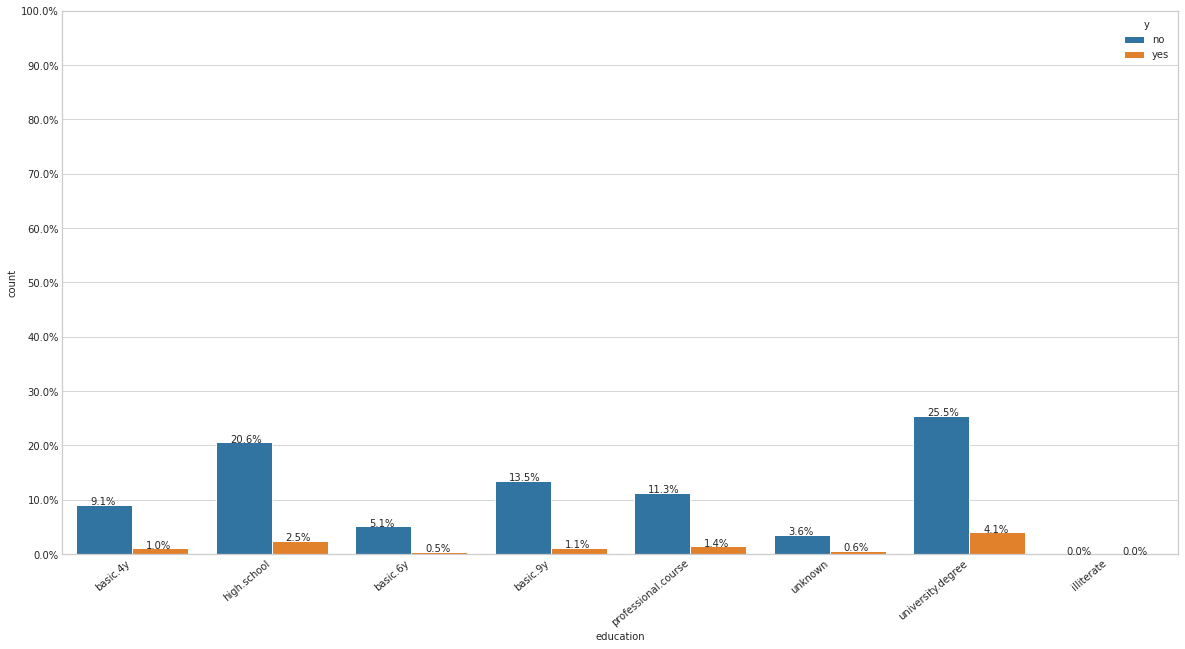

In [567]:
countplot_withY("education",  df_bank)

People with education qualifications, univeristy has subscribed more for long term deposits, followed by high school, basic 9Y and professional course

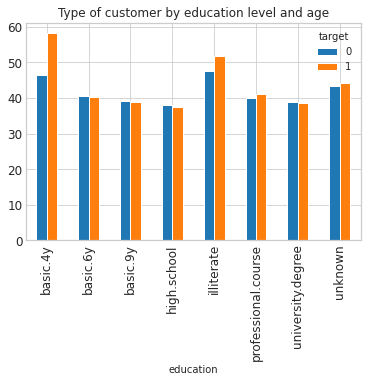

In [568]:
# Graph: Type of customer by education level and age
# Pivot_table
type_pivot = df_bank.pivot_table(
    columns="target",
    index="education",
    values="age", aggfunc=np.mean)

# Display pivot_table
type_pivot.sort_values(by=["education"], 
                       ascending=True).plot(kind="bar",
                                             title=("Type of customer by education level and age"), 
                                             figsize=(6,4),
                                             fontsize = 12);

### **Default**

*    Personal Attributes
*   has credit in default?

In [569]:
#Count of Default
for x in ["default"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

         default
no         32588
unknown     8597
yes            3


In [570]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["default"], columns=df_bank["y"])

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


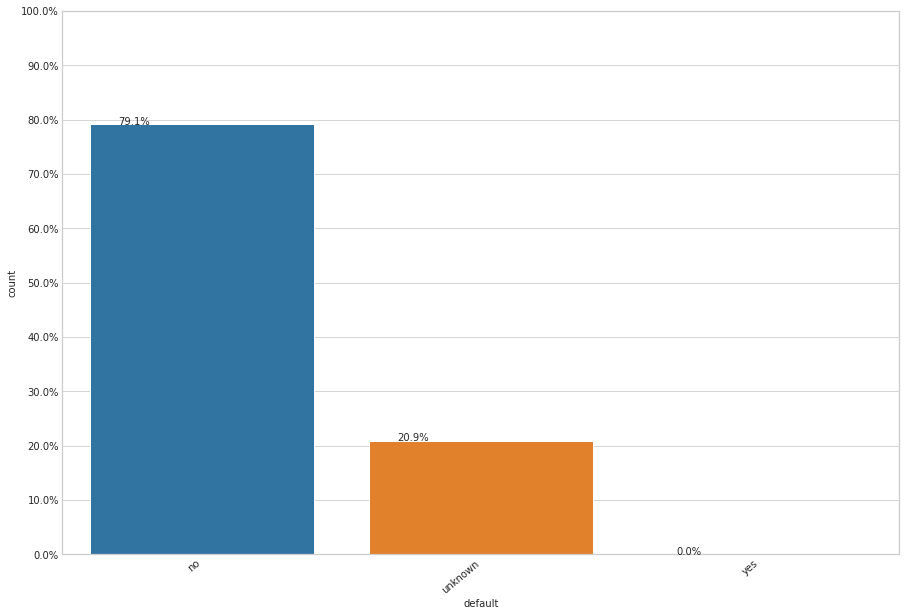

In [571]:
countplot("default", df_bank)

From the above plot we can see that bank has contacted to the person more who has no status in default and there no person whose default status is yes. Very few of them are there whose status is unknown.

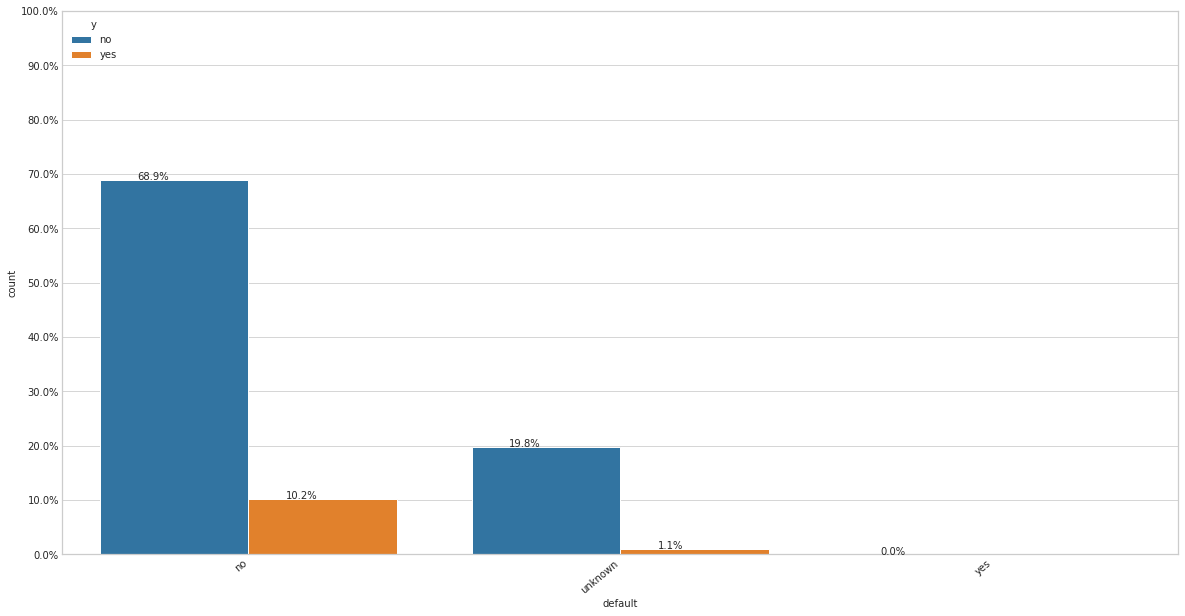

In [572]:
countplot_withY("default",  df_bank)

From the above plot we can observe that people who has no defult has subscribed to the long term deposits. They are most one's who has not subscribed for the deposits as well.

###    **Housing**

*    Personal Attributes
*    has housing loan? 



In [573]:
#Count of Default
for x in ["housing"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

         housing
no         18622
unknown      990
yes        21576


In [574]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["housing"], columns=df_bank["y"])

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


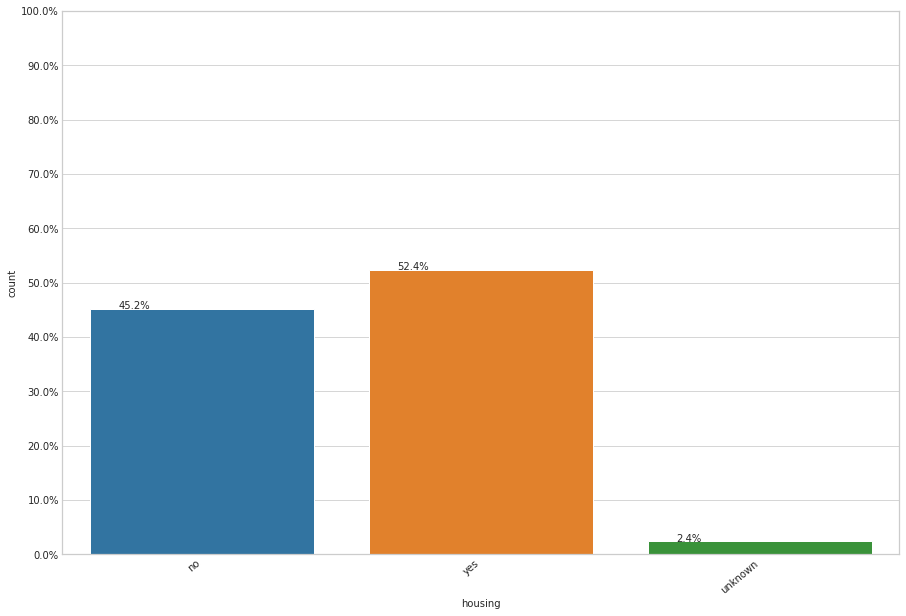

In [575]:
countplot("housing", df_bank)

People who have housing loan has been contacted more by the bank. People who has no housing has also been contacted pretty much. People who has status unknown has been least contacted.

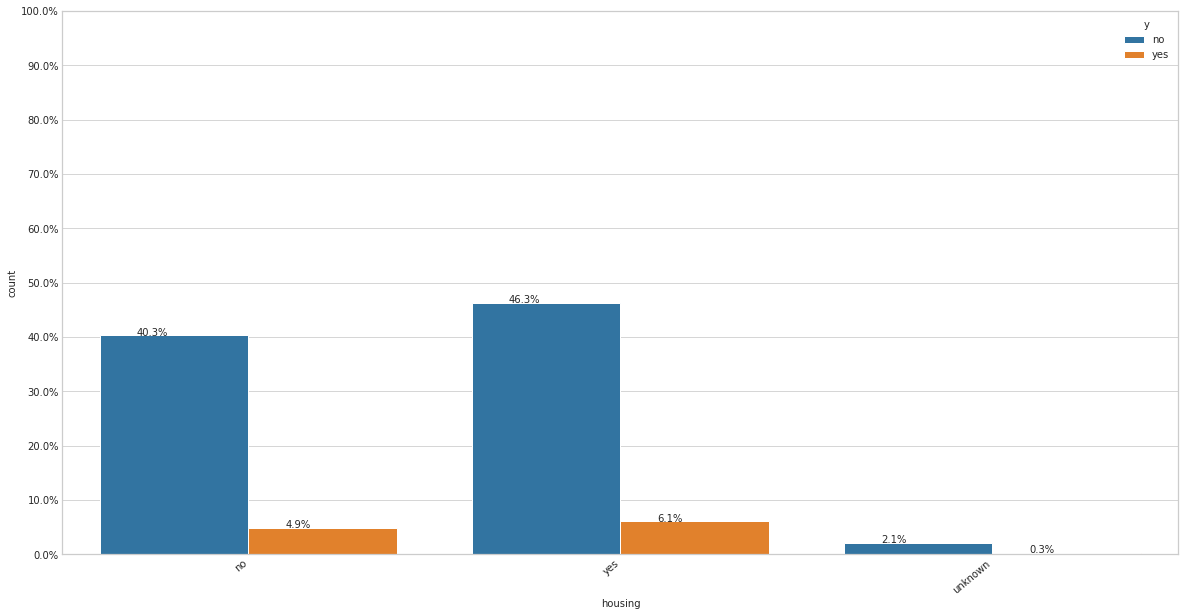

In [576]:
countplot_withY("housing",  df_bank)

People who has housing loan has subscribed more for long term deposits followed by who does not have.

###   **Loan**

*   Personal Attributes
*    has personal loan? 



In [577]:
#Count of Default
for x in ["loan"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

          loan
no       33950
unknown    990
yes       6248


In [578]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["loan"], columns=df_bank["y"])

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


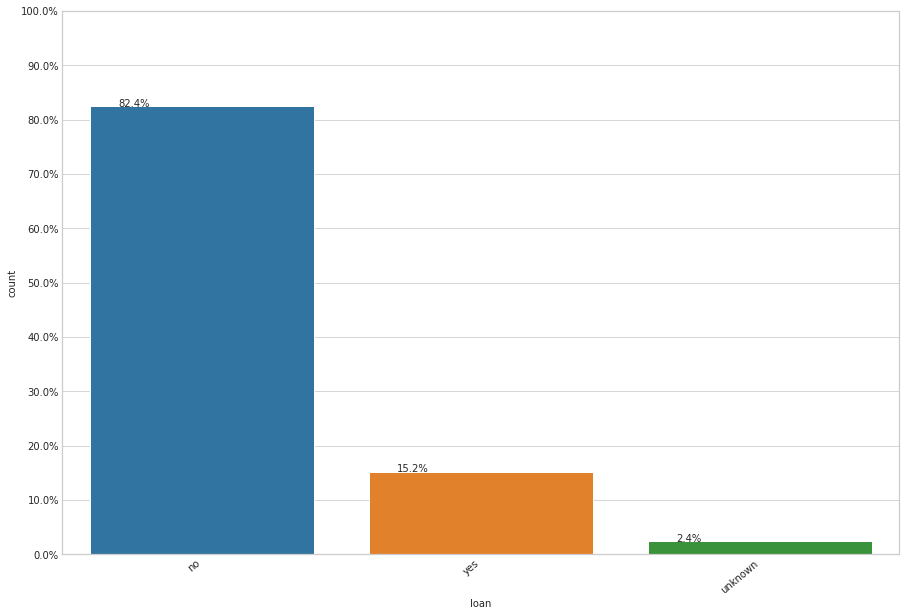

In [579]:
countplot("loan", df_bank)

People who doesnot have loan has been more contacted for longer term deposits than who does have

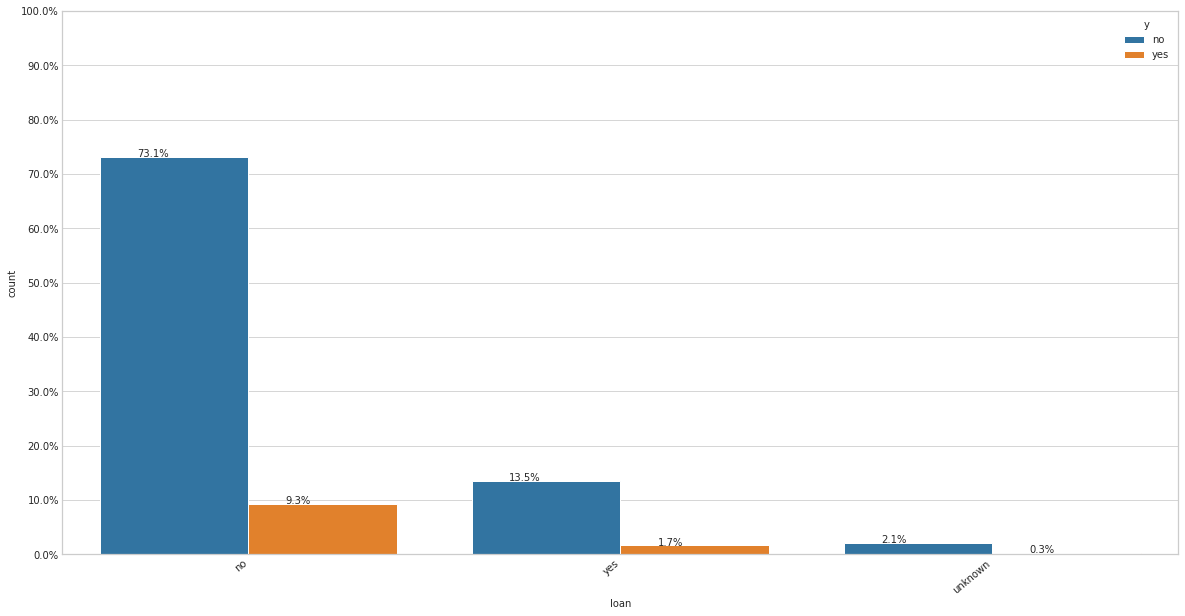

In [580]:
countplot_withY("loan",  df_bank)

People with no personal loan has subscribed more for long term deposits. They are also the ones who has not subscribed for long term deposits

###   **Contact**

*   related with the last contact of the current campaign:
*   contact communication type 



In [581]:
#Count of Default
for x in ["contact"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

           contact
cellular     26144
telephone    15044


In [582]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["contact"], columns=df_bank["y"])

y,no,yes
contact,,
cellular,22291,3853
telephone,14257,787


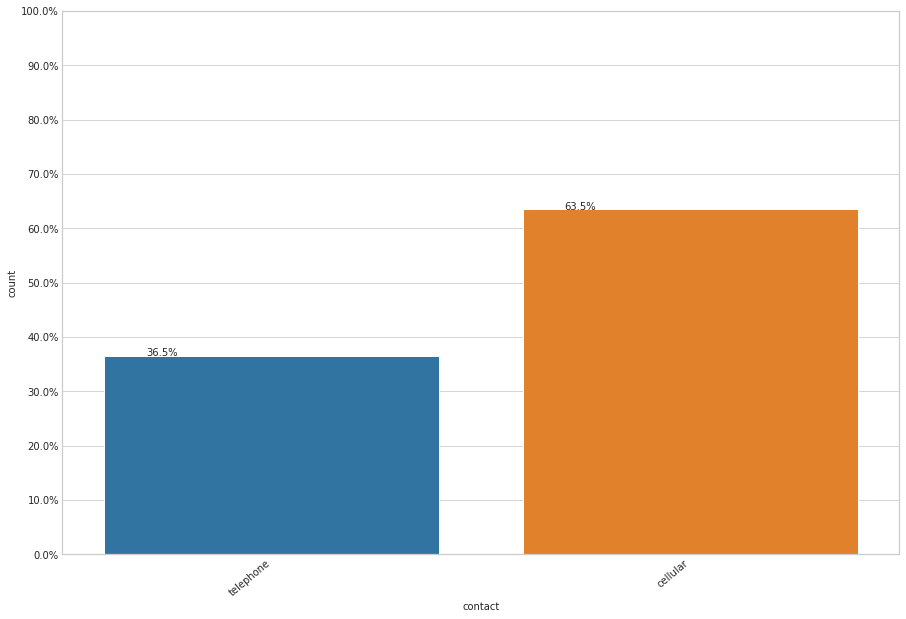

In [583]:
countplot("contact", df_bank)

People with contact type cellular has been contacted more than with telephone for long term deposits.

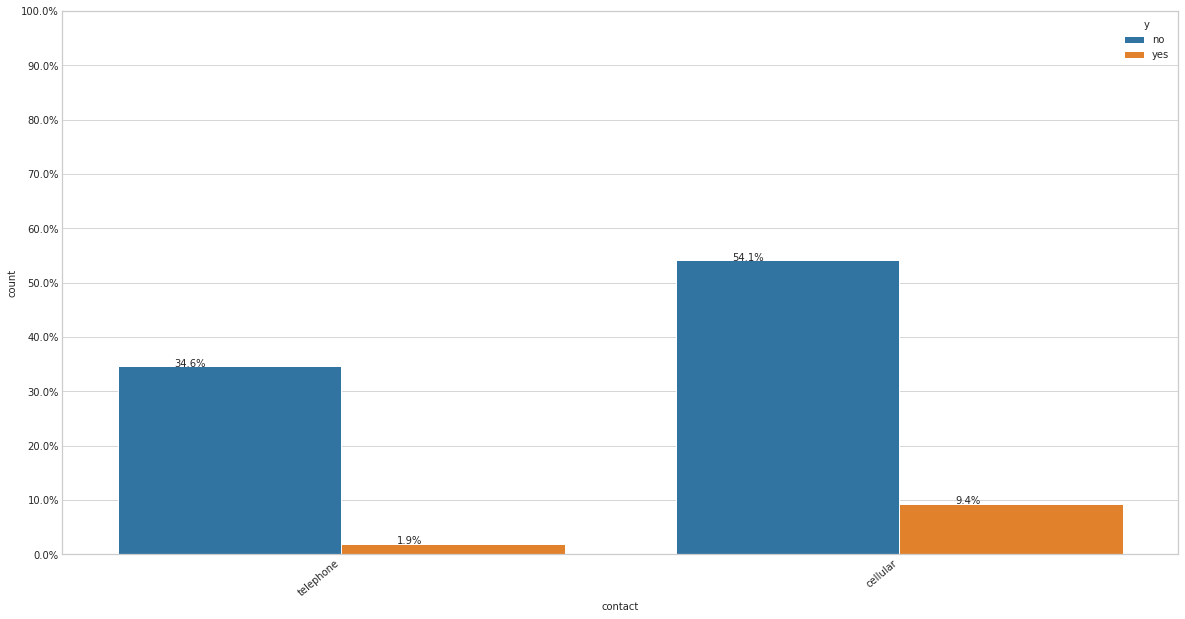

In [584]:
countplot_withY("contact",  df_bank)

from the above it appear that Cellular is the preferred contact type and higher percentage of subscriber. People with contact type cellular has subscribed more for long term deposits than telephone

### **Month**

*   related with the last contact of the current campaign:
*   last contact month of year 



In [585]:
#Count of Default
for x in ["month"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

     month
apr   2632
aug   6178
dec    182
jul   7174
jun   5318
mar    546
may  13769
nov   4101
oct    718
sep    570


In [586]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["month"], columns=df_bank["y"])

y,no,yes
month,,
apr,2093,539
aug,5523,655
dec,93,89
jul,6525,649
jun,4759,559
mar,270,276
may,12883,886
nov,3685,416
oct,403,315


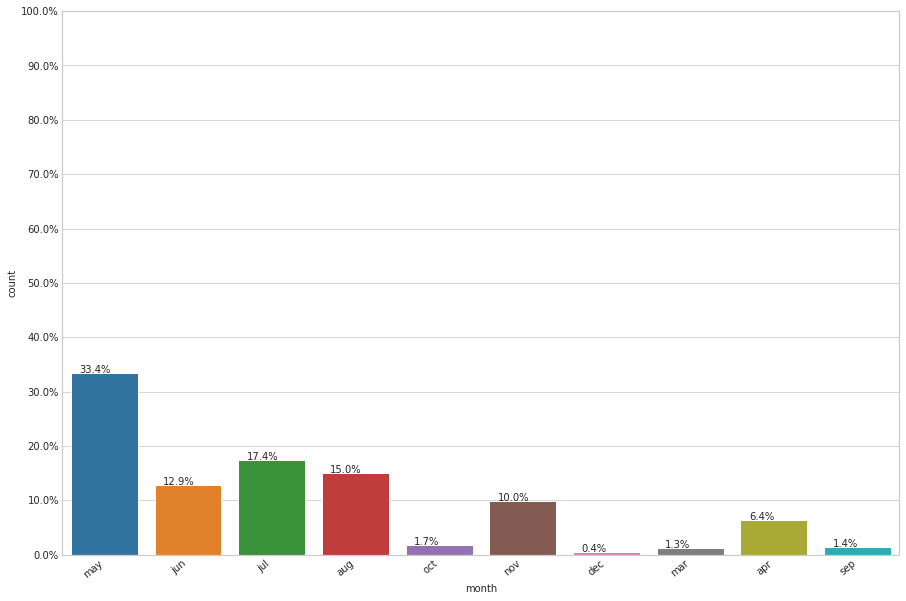

In [587]:
countplot("month", df_bank)

People are contacted more in the month of May than anyother months. It is followed by July,August, June

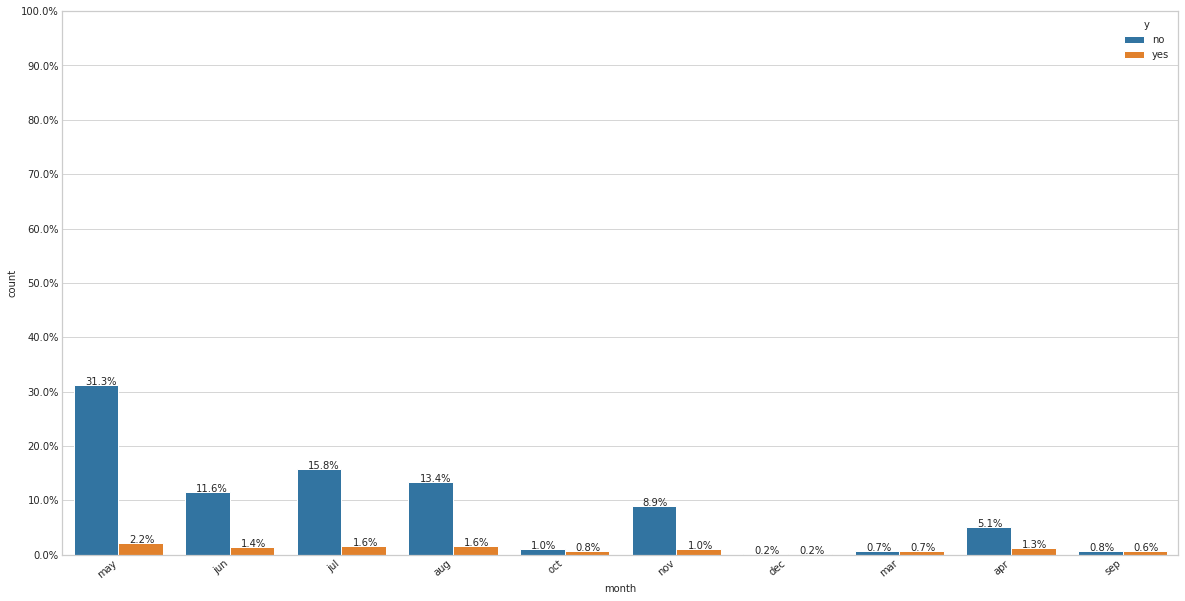

In [588]:
#countplot("marital", df_bank)
countplot_withY("month",  df_bank)

t is very interesting from the above query that people are not contacted in the month of January, Februrary. 

We can also see a pattern or some form of seasonality from Sep till Mar very few contacts are made, but more from Apr till Aug 

People who have contacted in May have higher chances to subscribe for longer term deposits but have also higher chances for not subscribing the long term deposits. Very few people are contacted in the month of December,March,September and October and have almost equal chances for subscribing the deposits or not.

From the above it appear most contact were made in the month of May

### **Days of the Week**

*   related with the last contact of the current campaign:
*   last contact day of the week 



In [589]:
#Count of Default
for x in ["day_of_week"]:
    y=pd.DataFrame(df_label[x].value_counts().sort_index())
    print(y)

     day_of_week
fri         7827
mon         8514
thu         8623
tue         8090
wed         8134


In [590]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["day_of_week"], columns=df_bank["y"])

y,no,yes
day_of_week,,
fri,6981,846
mon,7667,847
thu,7578,1045
tue,7137,953
wed,7185,949


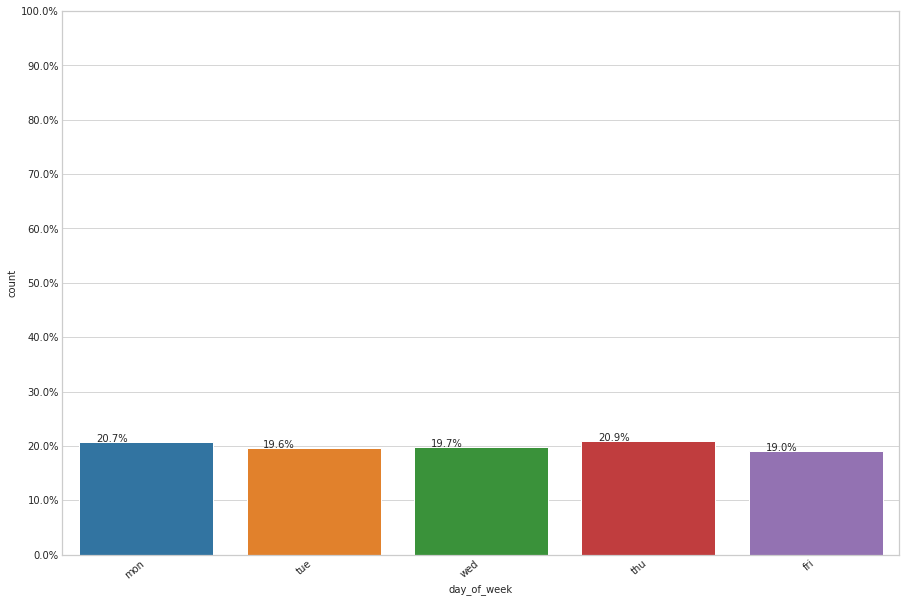

In [591]:
countplot("day_of_week", df_bank)

From the above plot we can see that people are contacted from Monday to Friday but not on Saturday and Sunday. In all the day people are contacted with the same percentage.

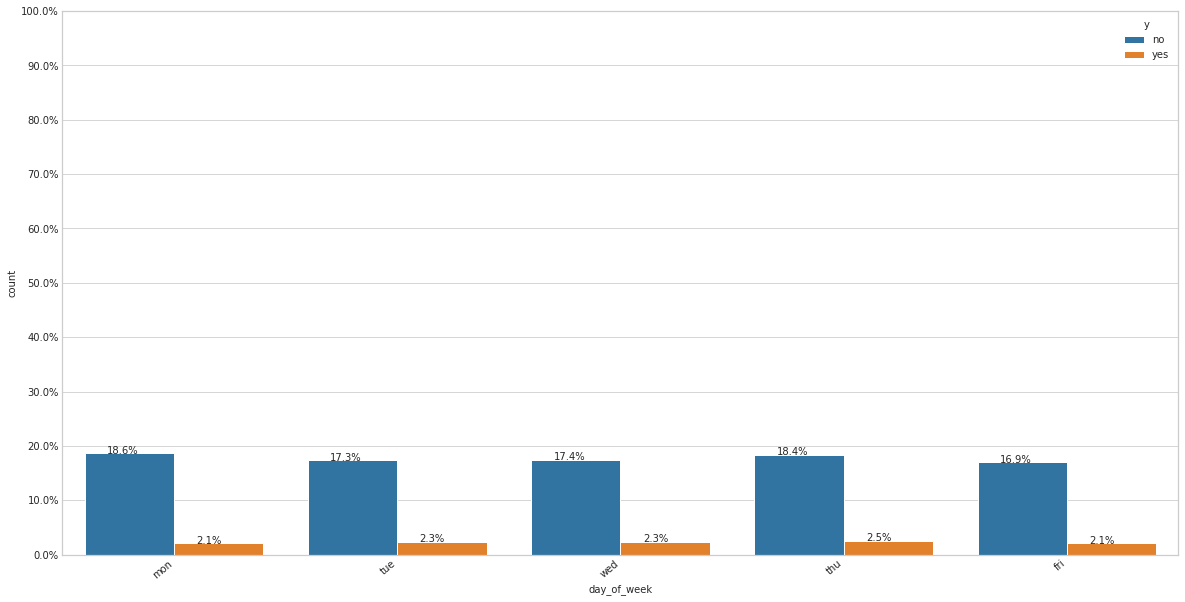

In [592]:
countplot_withY("day_of_week",  df_bank)

In all the days they have equal chances for subscribing and not subscribing the term deposits. Day_of_week maynot be very helpful in predciting whether the customer will subscribe for long term deposits or not.

### **poutcome**

*   other campaign attributes:
*   outcome of the previous marketing campaign 



In [593]:
df_bank["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [594]:
#Crosstab to display Marital stats with respect to y  class variable
pd.crosstab(index=df_bank["poutcome"], columns=df_bank["y"])

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


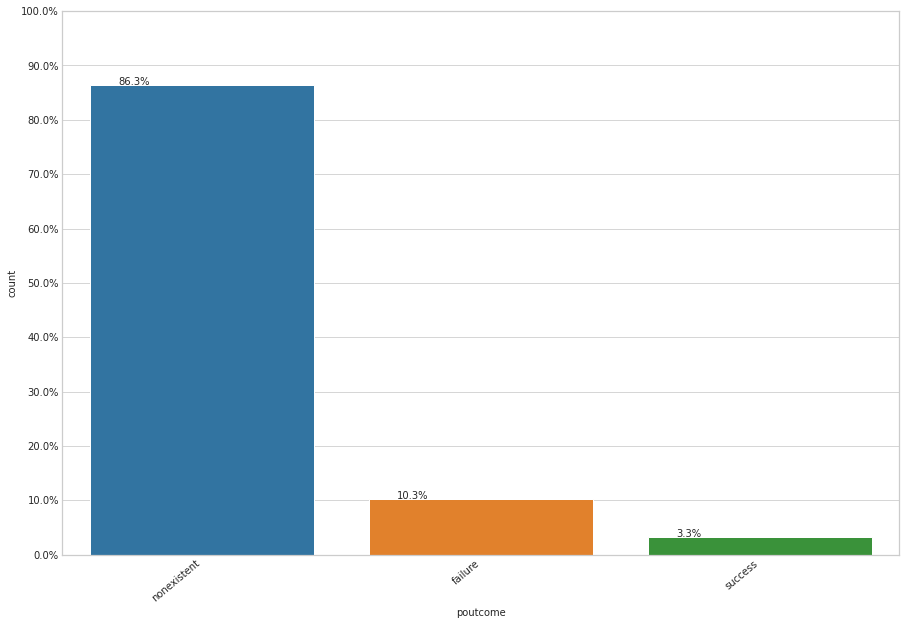

In [595]:
countplot("poutcome", df_bank)

From this plot it is evident that majority of outcome of previous campaigns are non existent. Very few people from previous marketing campaign has subscribed for long term deposits. This make sense as term deposit are long term investment and bank existing customer will not frequently make  such deposit or respond to campaign each time. 

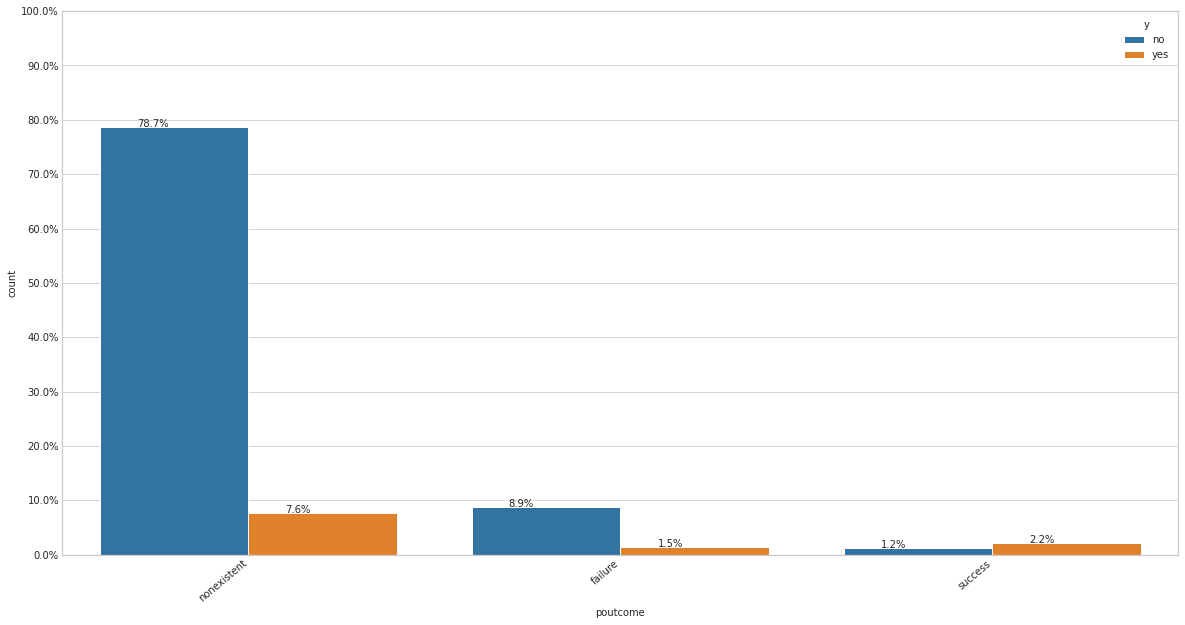

In [596]:
#countplot("marital", df_bank)
countplot_withY("poutcome",  df_bank)

From the above plot, whose previous outcome is non-existent has actually subscribed more than any other people belonging to previous outcome. It is also clear that people belonging to success category of previous outcome has turned down for longer deposits. But if ratio is considered,people with previous outcome as success has subscribed to long term deposits from the current marketing strategy more than people with previous outcome as success who turned down the long term deposits from the current marketing strategy

Text(0.5, 1.05, 'Pearson correlation of Features')

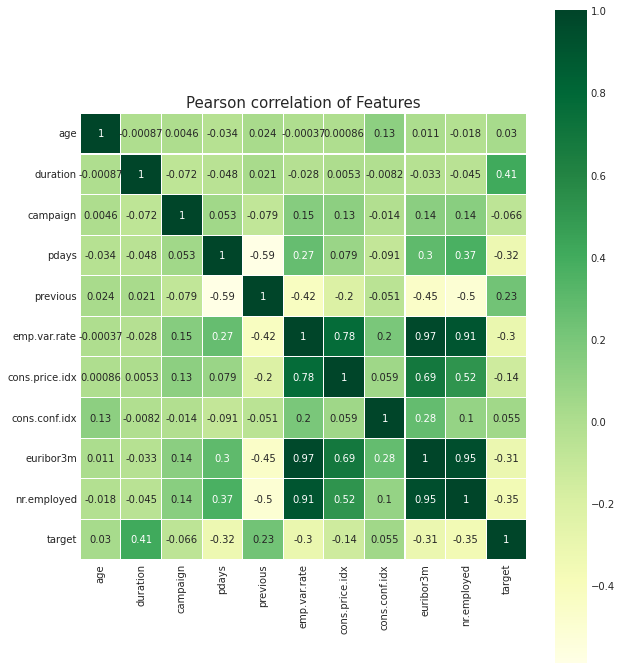

In [597]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = df_bankn.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

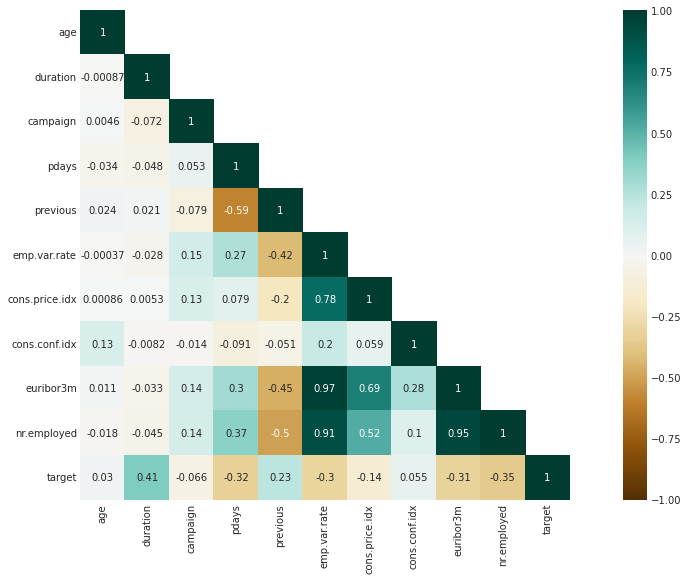

In [598]:
# Visualization of correlations (heatmap)
mask = np.triu(df_bank.corr(), 1)
plt.figure(figsize=(19, 9))
sns.heatmap(df_bank.corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask);

#Observations:

1. 'Student' and 'retired' have the highest percentage of subscriptions (>25%) whereas 'bue-collar' and 'services' have the lowest.
2. 'Iliterate' people have the highest percentage of subscriptions (>20%), on the other hand 'basic 9y', 'basic 6y' and 'basic 4y' have the lowest.
3. People with credit in default did not subscribed.
4. More than 60% of the people previously contacted to other campaigns subscribed.
5. Marital state, existance of loans and housing does not influence much the subscription rate.

#Data Preprocessing

In [599]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import brier_score_loss 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import average_precision_score

# Validation

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.metrics import calinski_harabaz_score

import itertools
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

## Load Data

In [600]:
#Load dataset
file_name = "https://raw.githubusercontent.com/omerbmk/CIND-820-OmerMirza/main/bank-additional-full.csv"
data = pd.read_csv(file_name, sep=';')


In [601]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

##Dealing with Missing data

In [602]:
# To Check for Missing Value
print (f"\nMissing values :  ", data.isnull().sum().values.sum())


Missing values :   0


##Dealing with duplicate data

In [603]:
print(data[data.duplicated(keep="last")])
#print(f"the number of dublicates are (row,column):",data[data.duplicated(keep="last")].shape)

       age          job   marital            education  default housing loan  \
1265    39  blue-collar   married             basic.6y       no      no   no   
12260   36      retired   married              unknown       no      no   no   
14155   27   technician    single  professional.course       no      no   no   
16819   47   technician  divorced          high.school       no     yes   no   
18464   32   technician    single  professional.course       no     yes   no   
20072   55     services   married          high.school  unknown      no   no   
20531   41   technician   married  professional.course       no     yes   no   
25183   39       admin.   married    university.degree       no      no   no   
28476   24     services    single          high.school       no     yes   no   
32505   35       admin.   married    university.degree       no     yes   no   
36950   45       admin.   married    university.degree       no      no   no   
38255   71      retired    single    uni

In [604]:
data = data.drop_duplicates()
data.shape

(41176, 21)

In [605]:
data.head(-100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,24,technician,single,university.degree,no,yes,yes,cellular,nov,tue,...,3,6,3,failure,-1.1,94.767,-50.8,1.049,4963.6,yes
41084,18,student,single,unknown,no,yes,no,cellular,nov,tue,...,2,999,3,failure,-1.1,94.767,-50.8,1.049,4963.6,no
41085,51,admin.,divorced,high.school,no,yes,yes,cellular,nov,tue,...,2,6,4,failure,-1.1,94.767,-50.8,1.049,4963.6,yes
41086,50,blue-collar,divorced,professional.course,no,yes,no,cellular,nov,tue,...,2,9,3,success,-1.1,94.767,-50.8,1.049,4963.6,no


## Outlier Handling

We check for outliers only in the features that contain numerical values.

In [606]:
df_num = data.select_dtypes(include = np.number)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   duration        41176 non-null  int64  
 2   campaign        41176 non-null  int64  
 3   pdays           41176 non-null  int64  
 4   previous        41176 non-null  int64  
 5   emp.var.rate    41176 non-null  float64
 6   cons.price.idx  41176 non-null  float64
 7   cons.conf.idx   41176 non-null  float64
 8   euribor3m       41176 non-null  float64
 9   nr.employed     41176 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 3.5 MB


In [607]:
# Check global outliers using 0.05 quantile and 0.95 quantile
min_p = df_num.quantile(0.05)
max_p = df_num.quantile(0.95)

# Column vs Number of Outliers
((df_num <= min_p) | (df_num >= max_p)).sum()

age                4594
duration           4151
campaign          20040
pdays             41176
previous          41176
emp.var.rate      19132
cons.price.idx     6895
cons.conf.idx      5260
euribor3m          4526
nr.employed       19356
dtype: int64

In [608]:
#We need to install cufflinks to link plotly to pandas and add the iplot method:

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

<IPython.core.display.Javascript object>

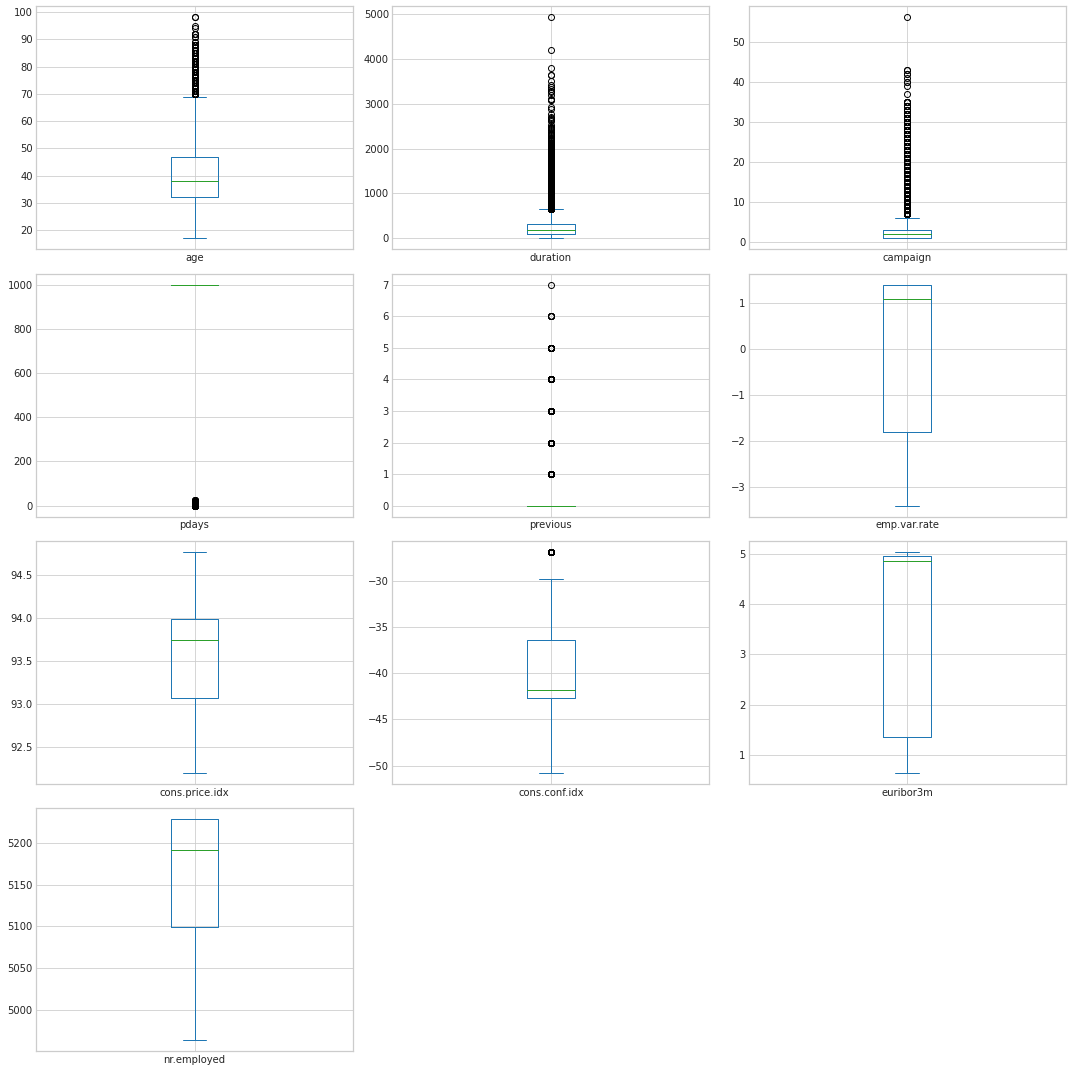

In [609]:
df_num.plot(kind='box',subplots=True,layout=(4,3),figsize=(15,15))
plt.tight_layout()

###Summary of Outlier

* age = there are no significant outliers, and that there are many datapoints that are outside the boxplot. Therefore, i will not be removing the datapoints that are identified here as outliers
* campaign = column has anomaly data point when compare to the other points (Try to remove it)
* pdays = Cannot remove any points, because it having lot of data points same place
* previous =  we cannot see any anomaly
* df_cont = we cannot see any anomaly
* cons.conf.idx  = has one outlier point and that can be visible  that are outside the boxplot. Therefore, i will not be removing the datapoints that are identified here as outliers
* euribor3m = we cannot see any anomaly
* nr.employed = we cannot see any anomaly




<IPython.core.display.Javascript object>

Before Shape: (41176, 21)
After Shape: (41175, 21)


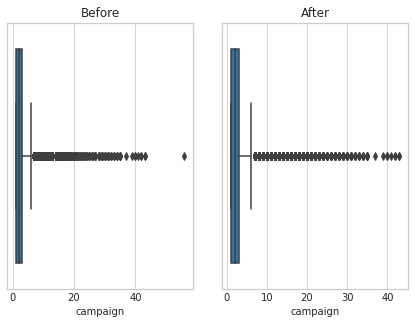

In [610]:
# Campaign Outlier removal
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

# DataFrame
print("Before Shape:",data.shape)

# Removing all the outliers
df2 = data[(data['campaign'] < 50)]

#Visulization
print("After Shape:",df2.shape)

sns.boxplot(data['campaign'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['campaign'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

data = df2

The above operation only removed the one row and it is better

<IPython.core.display.Javascript object>

Before Shape: (41175, 21)
After Shape: (41175, 21)


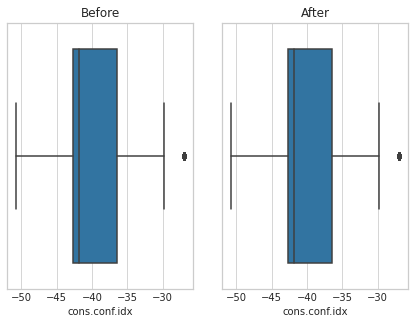

In [611]:
# cons.conf.idx Outlier removal
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(1,2)
plt.tight_layout(0.2)

# DataFrame
print("Before Shape:",data.shape)

# Removing all the outliers
df2 = data[(data['cons.conf.idx'] < 50)]

#Visulization
print("After Shape:",df2.shape)

sns.boxplot(data['cons.conf.idx'],orient='v',ax=axes[0])
axes[0].title.set_text("Before")
sns.boxplot(df2['cons.conf.idx'],orient='v',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

data = df2

## **Droping Columns**

In [612]:
#How many o values in every attribute

df_bank.isin([0]).sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              4
campaign              0
pdays                15
previous          35563
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
y                     0
target            36548
age_bins              0
dtype: int64

In [613]:
#Drop duration


data = data.drop(['duration'], axis=1)


duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [614]:
#previous 35563 is "0" (35563/41188 no data in this attribute ,I will drop this attribute)
data = data.drop(['previous'], axis=1)

In [615]:
#999 means client was not previously contacted makes 96% of the values of the column.
data = data.drop(['pdays'], axis=1)

In [616]:
data = data.drop(['emp.var.rate'], axis=1)
data = data.drop(['euribor3m'], axis=1)
data = data.drop(['cons.conf.idx'], axis=1)#which has a weak correlation but was deleted because

The social and economic context attributes have correlation among themselves. All columns with a high correlation will be removed to prevent Multicollinearity, it happens when predictor variable can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results. The columns are 'emp.var.rate','euribor3m'.'cons.conf.idx'-which has a weak correlation but was deleted because I had an error with this variable when modeling. .

## Dealing with categorical values

There are many ways to convert categorical values into numerical values. Each approach has its own trade-offs and impact on the feature set. Hereby, I would focus on 2 main methods: One-Hot-Encoding and Label-Encoder. Both of these encoders are part of SciKit-learn library (one of the most widely used Python library) and are used to convert text or categorical data into numerical data which the model expects and perform better with.

Label Encoding
This approach is very simple and it involves converting each value in a column to a number in a sequence. But depending upon the data values and type of data, label encoding induces a new problem since it uses number sequencing. The problem using the number is that they introduce relation/comparison between them.


One-Hot Encoder
Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Though this approach eliminates the hierarchy/order issues but does have the downside of adding more columns to the data set. It can cause the number of columns to expand greatly if you have many unique values in a category column


In [617]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


We hava 11 Catagory attributes, in order to avoid creating more columns I will be using Label encoding. However to eliminate hierarchy/order issue I will perform label encoding to only selected columns where relationship issue do no occur

* job
* marital
* education
* contact
* poutcome
* y

In [618]:
from sklearn.preprocessing import LabelEncoder
LabEn=LabelEncoder()
categorical_var=['job','marital', 'education','contact', 'poutcome','y']
for i in categorical_var:
    data[i]=LabEn.fit_transform(data[i])
    
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,nr.employed,y
0,56,3,1,0,no,no,no,1,may,mon,1,1,93.994,5191.0,0
1,57,7,1,3,unknown,no,no,1,may,mon,1,1,93.994,5191.0,0
2,37,7,1,3,no,yes,no,1,may,mon,1,1,93.994,5191.0,0
3,40,0,1,1,no,no,no,1,may,mon,1,1,93.994,5191.0,0
4,56,7,1,3,no,no,yes,1,may,mon,1,1,93.994,5191.0,0


In [619]:
#I will be converting the month and day by it's corresponding number  
from sklearn.preprocessing import OrdinalEncoder

# checking the values in Month field
data['month'].value_counts()
education_mapper = {'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
data['month'] = data['month'].replace(education_mapper)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,nr.employed,y
0,56,3,1,0,no,no,no,1,5,mon,1,1,93.994,5191.0,0
1,57,7,1,3,unknown,no,no,1,5,mon,1,1,93.994,5191.0,0
2,37,7,1,3,no,yes,no,1,5,mon,1,1,93.994,5191.0,0
3,40,0,1,1,no,no,no,1,5,mon,1,1,93.994,5191.0,0
4,56,7,1,3,no,no,yes,1,5,mon,1,1,93.994,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,no,yes,no,0,11,fri,1,1,94.767,4963.6,1
41184,46,1,1,5,no,no,no,0,11,fri,1,1,94.767,4963.6,0
41185,56,5,1,6,no,yes,no,0,11,fri,2,1,94.767,4963.6,0
41186,44,9,1,5,no,no,no,0,11,fri,1,1,94.767,4963.6,1


In [620]:
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0, 'unknown':2}

#Replace binary values in data using the provided dictionary
for item in binary_valued_features:
    data.replace({item:bin_dict},inplace=True)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,nr.employed,y
0,56,3,1,0,0,0,0,1,5,mon,1,1,93.994,5191.0,0
1,57,7,1,3,2,0,0,1,5,mon,1,1,93.994,5191.0,0
2,37,7,1,3,0,1,0,1,5,mon,1,1,93.994,5191.0,0
3,40,0,1,1,0,0,0,1,5,mon,1,1,93.994,5191.0,0
4,56,7,1,3,0,0,1,1,5,mon,1,1,93.994,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,11,fri,1,1,94.767,4963.6,1
41184,46,1,1,5,0,0,0,0,11,fri,1,1,94.767,4963.6,0
41185,56,5,1,6,0,1,0,0,11,fri,2,1,94.767,4963.6,0
41186,44,9,1,5,0,0,0,0,11,fri,1,1,94.767,4963.6,1


In [621]:
# checking the values in Month field
data['day_of_week'].value_counts()
education_mapper = {'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
data['day_of_week'] = data['day_of_week'].replace(education_mapper)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,nr.employed,y
0,56,3,1,0,0,0,0,1,5,2,1,1,93.994,5191.0,0
1,57,7,1,3,2,0,0,1,5,2,1,1,93.994,5191.0,0
2,37,7,1,3,0,1,0,1,5,2,1,1,93.994,5191.0,0
3,40,0,1,1,0,0,0,1,5,2,1,1,93.994,5191.0,0
4,56,7,1,3,0,0,1,1,5,2,1,1,93.994,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,11,6,1,1,94.767,4963.6,1
41184,46,1,1,5,0,0,0,0,11,6,1,1,94.767,4963.6,0
41185,56,5,1,6,0,1,0,0,11,6,2,1,94.767,4963.6,0
41186,44,9,1,5,0,0,0,0,11,6,1,1,94.767,4963.6,1


In [622]:
#The dataset contains nine object type variables. I will use 
#a custom function by sklearn's preprocessing tool 
#to convert all nine variables to numerical labels .
from sklearn.preprocessing import LabelEncoder
LabEn=LabelEncoder()

categorical_var=['job','marital', 'education','contact', 'poutcome','y']
for i in categorical_var:
    data[i]=LabEn.fit_transform(data[i])
    
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,nr.employed,y
0,56,3,1,0,0,0,0,1,5,2,1,1,93.994,5191.0,0
1,57,7,1,3,2,0,0,1,5,2,1,1,93.994,5191.0,0
2,37,7,1,3,0,1,0,1,5,2,1,1,93.994,5191.0,0
3,40,0,1,1,0,0,0,1,5,2,1,1,93.994,5191.0,0
4,56,7,1,3,0,0,1,1,5,2,1,1,93.994,5191.0,0


In [623]:
from sklearn.preprocessing import OrdinalEncoder

# checking the values in education field
data['education'].value_counts()
education_mapper = {"basic.4y": 0,"basic.6y": 1, "basic.9y":2, "high.school":3, "illiterate":4, "professional.course":5 ,"university.degree":6 ,"unknown":-1}
data["education"] = data["education"].replace(education_mapper)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,nr.employed,y
0,56,3,1,0,0,0,0,1,5,2,1,1,93.994,5191.0,0
1,57,7,1,3,2,0,0,1,5,2,1,1,93.994,5191.0,0
2,37,7,1,3,0,1,0,1,5,2,1,1,93.994,5191.0,0
3,40,0,1,1,0,0,0,1,5,2,1,1,93.994,5191.0,0
4,56,7,1,3,0,0,1,1,5,2,1,1,93.994,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,0,11,6,1,1,94.767,4963.6,1
41184,46,1,1,5,0,0,0,0,11,6,1,1,94.767,4963.6,0
41185,56,5,1,6,0,1,0,0,11,6,2,1,94.767,4963.6,0
41186,44,9,1,5,0,0,0,0,11,6,1,1,94.767,4963.6,1


In [624]:
from sklearn.preprocessing import LabelEncoder

# encode strings to integer
data['contact'] = LabelEncoder().fit_transform(data['y'])
data['contact']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: contact, Length: 41175, dtype: int64

In [625]:
from sklearn.preprocessing import LabelEncoder

# encode strings to integer
data['y'] = LabelEncoder().fit_transform(data['y'])
data['y']

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41175, dtype: int64

In [626]:
#Checking null values after converting categorical values
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
poutcome          0
cons.price.idx    0
nr.employed       0
y                 0
dtype: int64

In [627]:
# Removing any NaNs or anomalies just to make sure
data.dropna(how="any", axis=0)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,nr.employed,y
0,56,3,1,0,0,0,0,0,5,2,1,1,93.994,5191.0,0
1,57,7,1,3,2,0,0,0,5,2,1,1,93.994,5191.0,0
2,37,7,1,3,0,1,0,0,5,2,1,1,93.994,5191.0,0
3,40,0,1,1,0,0,0,0,5,2,1,1,93.994,5191.0,0
4,56,7,1,3,0,0,1,0,5,2,1,1,93.994,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,1,0,1,11,6,1,1,94.767,4963.6,1
41184,46,1,1,5,0,0,0,0,11,6,1,1,94.767,4963.6,0
41185,56,5,1,6,0,1,0,0,11,6,2,1,94.767,4963.6,0
41186,44,9,1,5,0,0,0,1,11,6,1,1,94.767,4963.6,1


As can be seen from the plot duration is a very important feature. This is the duration of last call with client.
If the call duration is more , there are higher chances of getting a yes from the client.
It has been sorted in descending order.
Succes , cellular, housing, unknown, campaign are also highly correlated

In [628]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data['y']
print("Shape of Y:", data_y.shape)

Shape of X: (41175, 14)
Shape of Y: (41175,)


In [629]:
data_y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41175, dtype: int64

##Train Test split

---



In [630]:
# Select Features
feature = data_x

# Select Target
target = data_y

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (32940, 14)
Shape of testing feature: (8235, 14)
Shape of training label: (32940,)
Shape of training label: (8235,)


from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

In [631]:
y_train

11279    0
26921    0
29730    0
30926    0
23850    0
        ..
7815     0
32522    0
5194     0
12174    0
33014    0
Name: y, Length: 32940, dtype: int64

In [632]:
#Standardisation of Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [633]:
smote = SMOTE(random_state=0)

In [634]:
X_train, y_train = smote.fit_resample(X_train, y_train)

In [635]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,nr.employed
0,43,1,0,2,2,0,0,0,6,5,1,1,94.465000,5228.1
1,30,7,1,3,0,1,1,0,11,5,2,0,93.200000,5195.8
2,37,1,2,0,0,1,0,0,4,2,3,1,93.075000,5099.1
3,54,4,1,6,0,1,1,0,5,3,1,0,92.893000,5099.1
4,38,0,1,6,0,0,0,0,8,6,1,1,93.444000,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58543,52,1,0,3,2,0,0,1,6,2,2,1,94.146262,5228.1
58544,43,8,1,5,0,0,0,1,7,4,1,0,94.215000,4991.6
58545,38,8,2,6,0,0,0,1,5,2,1,1,93.994000,5191.0
58546,33,0,0,6,0,0,0,1,7,5,1,1,93.672710,5228.1


<IPython.core.display.Javascript object>

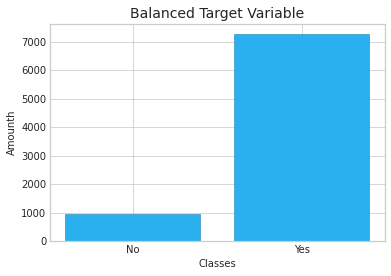

In [636]:
plt.bar(['No','Yes'], [sum(y_test), len(y_test)-sum(y_test)], facecolor = '#2ab0ee', edgecolor='#167aaa', linewidth=0.5)
plt.title('Balanced Target Variable', fontsize=14)
plt.xlabel('Classes')
plt.ylabel('Amounth')
plt.show()

<IPython.core.display.Javascript object>

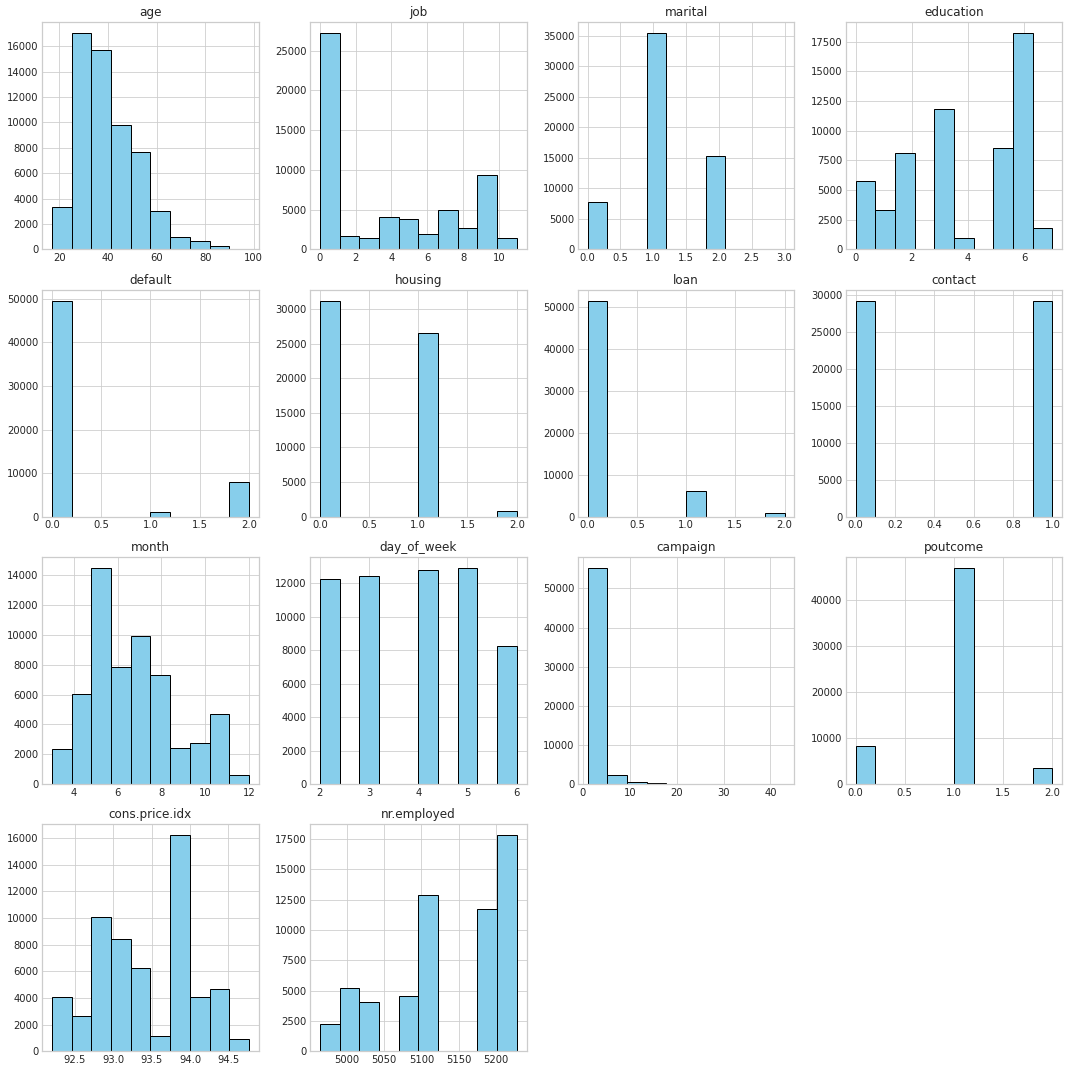

In [637]:
# histograms of the variables
#Histogram for the numerical attributes
X_train.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

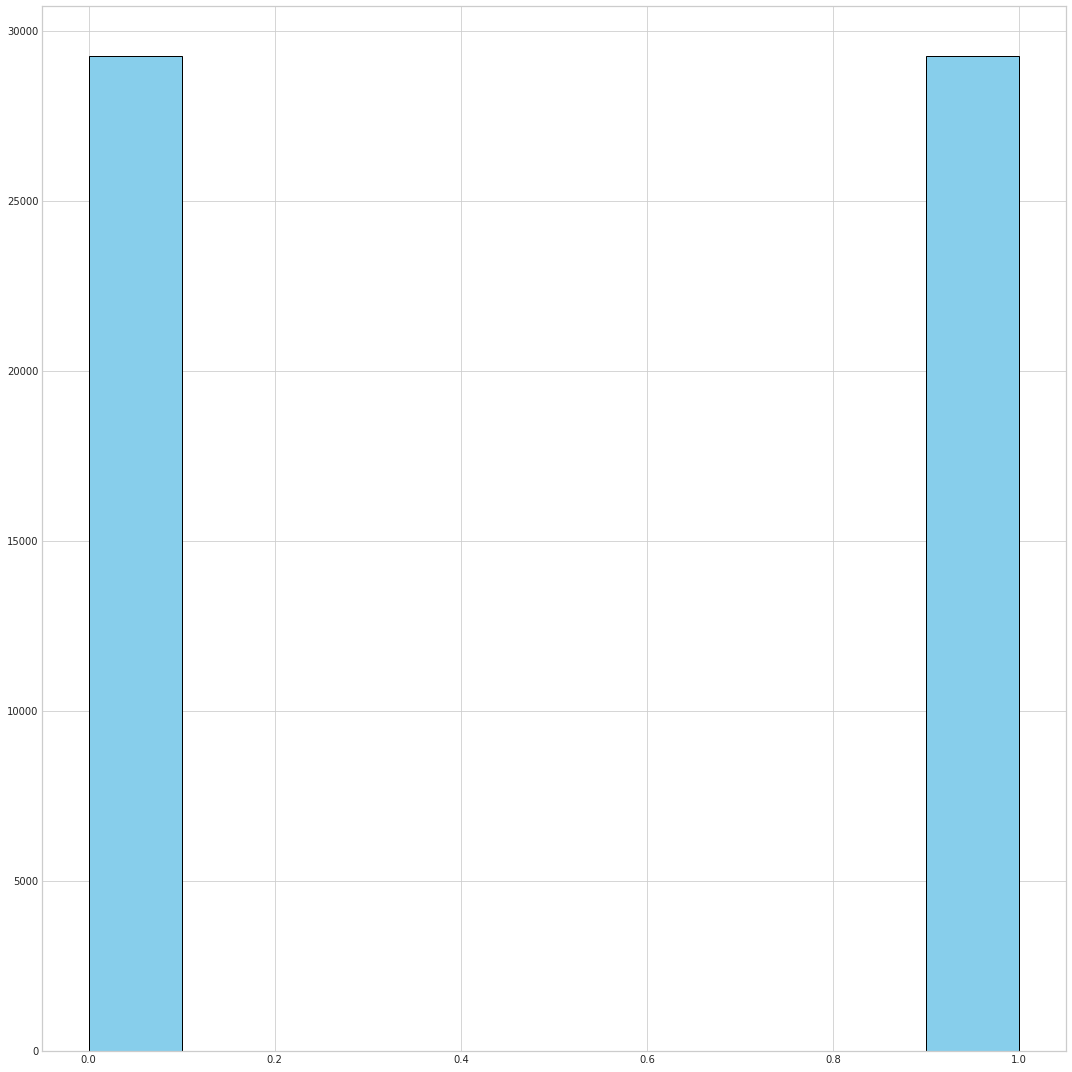

In [638]:
# histograms of the variables
#Histogram for the numerical attributes
y_train.hist(figsize=(15,15),edgecolor='k',color='skyblue')
plt.tight_layout()
plt.show()

**Supporting Function**

In [639]:
def conf_matrix(cnf_matrix):
    '''
    Visualization function for confusion matrix
    '''
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) # Create the basic matrix.

    #Add title and Axis Labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = set(y) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.style.use('seaborn-white')
    #Add Labels to Each Cell
    thresh = cnf_matrix.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()
    
def plot_feature_importances(model):
    '''
    Visualization for future importance
    '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,12))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

<IPython.core.display.Javascript object>

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,nr.employed
age,1.000000,-0.010297,-0.453308,-0.173773,0.119595,-0.011458,-0.012564,0.028244,0.065283,-0.040009,-0.004080,-0.009256,-0.014055,-0.071743
job,-0.010297,1.000000,0.050622,0.095378,-0.032435,0.014627,0.001128,0.013346,0.044922,-0.010591,-0.014857,-0.001491,-0.020713,-0.042983
marital,-0.453308,0.050622,1.000000,0.117695,-0.056516,0.034286,0.025159,-0.052421,-0.031753,0.033390,-0.004225,0.003067,-0.048839,-0.048252
education,-0.173773,0.095378,0.117695,1.000000,-0.180019,0.013337,-0.010440,0.049957,0.095606,0.006748,-0.006318,0.034127,-0.081295,-0.084900
default,0.119595,-0.032435,-0.056516,-0.180019,1.000000,0.026795,0.039394,-0.225539,-0.066322,0.025126,0.073468,0.025885,0.184791,0.267494
housing,-0.011458,0.014627,0.034286,0.013337,0.026795,1.000000,0.279254,-0.169037,-0.011524,0.019152,0.022674,0.003149,-0.021087,0.042233
loan,-0.012564,0.001128,0.025159,-0.010440,0.039394,0.279254,1.000000,-0.170502,-0.007775,0.017680,0.032486,0.006947,0.039435,0.068124
contact,0.028244,0.013346,-0.052421,0.049957,-0.225539,-0.169037,-0.170502,1.000000,0.020111,-0.079411,-0.195220,0.011256,-0.197775,-0.462863
month,0.065283,0.044922,-0.031753,0.095606,-0.066322,-0.011524,-0.007775,0.020111,1.000000,-0.004425,-0.034558,0.044067,-0.098199,0.005312
day_of_week,-0.040009,-0.010591,0.033390,0.006748,0.025126,0.019152,0.017680,-0.079411,-0.004425,1.000000,0.026394,-0.009478,0.009919,0.038709


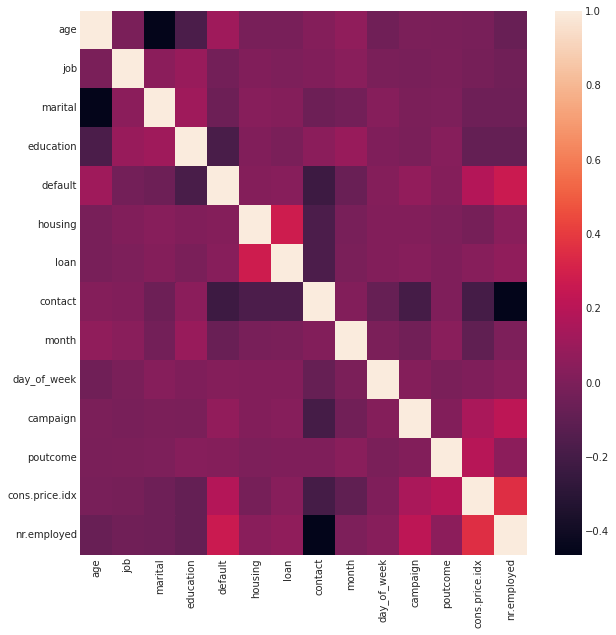

In [640]:
## draw the correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

In [641]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,poutcome,cons.price.idx,nr.employed
0,43,1,0,2,2,0,0,0,6,5,1,1,94.465000,5228.1
1,30,7,1,3,0,1,1,0,11,5,2,0,93.200000,5195.8
2,37,1,2,0,0,1,0,0,4,2,3,1,93.075000,5099.1
3,54,4,1,6,0,1,1,0,5,3,1,0,92.893000,5099.1
4,38,0,1,6,0,0,0,0,8,6,1,1,93.444000,5228.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58543,52,1,0,3,2,0,0,1,6,2,2,1,94.146262,5228.1
58544,43,8,1,5,0,0,0,1,7,4,1,0,94.215000,4991.6
58545,38,8,2,6,0,0,0,1,5,2,1,1,93.994000,5191.0
58546,33,0,0,6,0,0,0,1,7,5,1,1,93.672710,5228.1


In [642]:
from sklearn.decomposition import PCA

# apply the PCA for feature for feature reduction
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

X_train

array([[-92.36897598],
       [-60.18851633],
       [ 36.55476926],
       ...,
       [-55.29087372],
       [-92.45426114],
       [144.04684286]])

In [643]:
pca.explained_variance_ratio_

array([0.97762152])

In [644]:
# Removing duration feature 

# From Train

print("The shape of the train dataset: ", X_train.shape)

# From CV

#print("The shape of the cv dataset: ", X_cv.shape)

# From Test

print("The shape of the test dataset: ", X_test.shape)

The shape of the train dataset:  (58548, 1)
The shape of the test dataset:  (8235, 1)


**Logistic Regression**

AUC: 0.7458181602299969


<IPython.core.display.Javascript object>

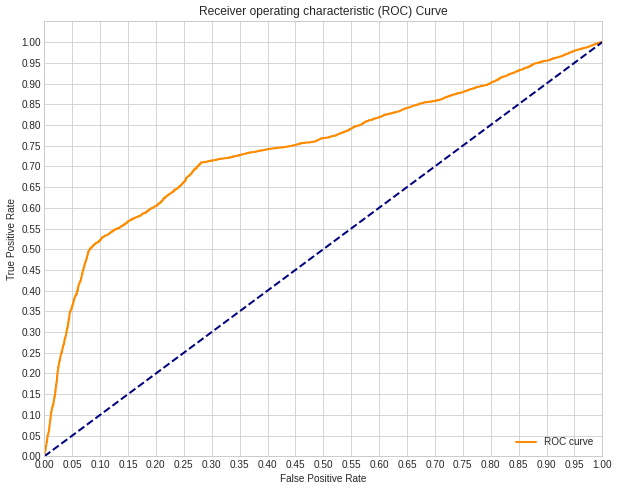

In [645]:
plt.style.use('seaborn-whitegrid')
logreg = LogisticRegression(fit_intercept=False, n_jobs=-1)

#Probability scores for test set
y_score = logreg.fit(X_train, y_train).decision_function(X_train)
y_pred = logreg.fit(X_train, y_train).predict(X_test)
#False positive Rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_train, y_score)

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Evaluation of Logistic Regression**

In [646]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82      7262
           1       0.26      0.72      0.39       973

    accuracy                           0.73      8235
   macro avg       0.61      0.73      0.61      8235
weighted avg       0.87      0.73      0.77      8235



<IPython.core.display.Javascript object>

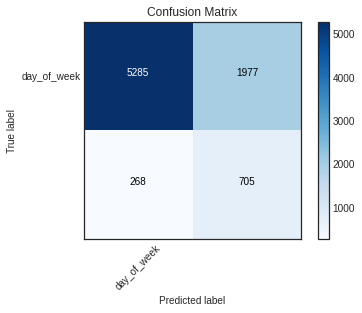

In [647]:
plt.style.use('seaborn-white')
logreg = LogisticRegression(fit_intercept=False, n_jobs=-1)
y_pred = logreg.fit(X_train, y_train).predict(X_test)
conf_matrix(confusion_matrix(y_test, y_pred))

**MLP**

In [648]:
from sklearn.decomposition import PCA

# apply the PCA for feature for feature reduction
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

X_train

array([[-92.36897598],
       [-60.18851633],
       [ 36.55476926],
       ...,
       [-55.29087372],
       [-92.45426114],
       [144.04684286]])

In [649]:
from sklearn.neural_network import MLPClassifier 

# define and train an MLPClassifier named mlp on the given data
mlp = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 200, 50), max_iter=300, random_state=1)

In [650]:
X_train

array([[-92.36897598],
       [-60.18851633],
       [ 36.55476926],
       ...,
       [-55.29087372],
       [-92.45426114],
       [144.04684286]])

**Confusion Matrix**

Accuracy
0.7273831208257437


<IPython.core.display.Javascript object>

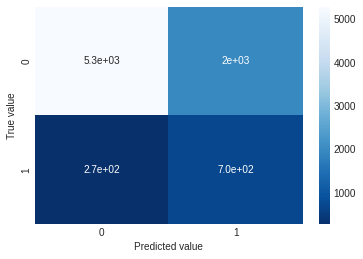

In [689]:
print('Accuracy')
print(mlp.score(X_test, y_test))

# draw the confusion matrix
predict = mlp.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues_r , annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

In [690]:
from sklearn.neural_network import MLPClassifier 

# define and train an MLPClassifier named mlp on the given data
mlp = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 200, 50), max_iter=300, random_state=1)

In [691]:
from sklearn.neural_network import MLPClassifier 

# define and train an MLPClassifier named mlp on the given data
mlp = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(50, 200, 50), max_iter=300, random_state=1)

The above confusion matrix shows that there are 340 true positives and 7400 false negatives, which is still good for an imbalanced dataset. The number of false positives are 570 and true negatives are 750.

We can find the Mean Squared Error (MSE) and other scores as follows.

In [652]:
from sklearn.metrics import accuracy_score, mean_squared_error

# print the training error and MSE
print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))
print(accuracy_score(y_test, predict))

print("MSE: %f" % mean_squared_error(y_test, predict))

Training error: 0.561727
Training set score: 0.714217
Test set score: 0.727383
0.7273831208257437
MSE: 0.272617


**SVM Model**

In [653]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=0)
#X_sm_pca, y_sm = sm.fit_resample(x_train_pca, y_train)
#print(f'''Shape of X before SMOTE: {x_train_pca.shape}
#Shape of X after SMOTE: {X_sm_pca.shape}''')
#print('\nBalance of positive and negative classes (%):')
#y_sm = pd.DataFrame(y_sm, columns=["y"])
#y_sm.value_counts(normalize=True) * 100
#y_sm.value_counts().plot(kind='bar', figsize=(6, 4))
#plt.title('y - has the client subscribed a term deposit? (0 = no, 1 = yes)', size=20, pad=30)

In [654]:
from sklearn import svm
# we create an instance of SVM and fit out data.
svc = svm.SVC(kernel='rbf', C=0.1, gamma=0.1).fit(X_train,y_train)

In [655]:
predictions = svc.predict(X_test)
y_hat = pd.DataFrame(predictions, columns=["Predicted y"])

<IPython.core.display.Javascript object>

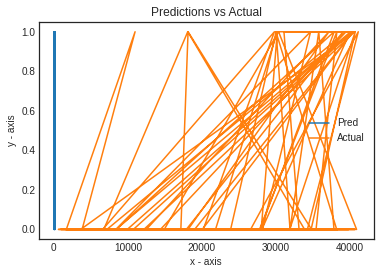

In [656]:
plt.plot(y_hat[:150], label = "Pred")
plt.plot(y_test[:150], label = "Actual")
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')
# Set a title of the current axes.
plt.title('Predictions vs Actual')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

<IPython.core.display.Javascript object>

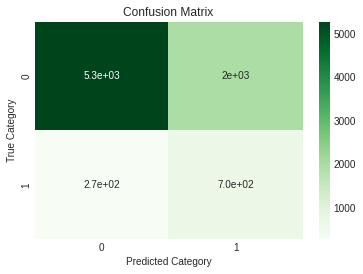

In [657]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Category')
plt.xlabel('Predicted Category')
plt.show()

In [658]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.95      0.73      0.82      7262
           1       0.26      0.72      0.39       973

    accuracy                           0.73      8235
   macro avg       0.61      0.73      0.61      8235
weighted avg       0.87      0.73      0.77      8235



**Random Forest**

In [659]:
#see the classification performance of the Random Forest using  all 15 features 
# To improve the results of RF I tested n_estimators for 40,50,100,200,10000 
#with max_depth of 2, 3 and 4

FullRandFor = RandomForestClassifier(n_estimators=50, random_state=43, max_depth=3)
FullRandFor.fit(X_train, y_train)

fulltrainpred = FullRandFor.predict_proba(X_train)
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, fulltrainpred[:,1])))

fulltestpred = FullRandFor.predict_proba(X_test)
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, fulltestpred[:,1])))

Accuracy on training set: 0.7742817514030143
Accuracy on test set: 0.7783243838104165


<IPython.core.display.Javascript object>

Text(0.5, 0, 'False Positive Rate(1-Specificity)')

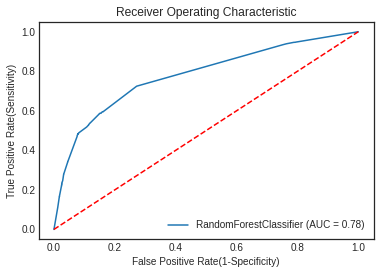

In [660]:
# draw the ROC-AUC chart 
metrics.plot_roc_curve(FullRandFor, X_test, y_test)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')

In [661]:
predictR = FullRandFor.predict(X_test)

In [662]:
print("Random Forest with all 15 Features")
cm = confusion_matrix(y_test, pred6)
print(cm)
print('\n')
print(classification_report(y_test,predictR))
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Random Forest with all 15 Features
[[6111 1151]
 [ 395  578]]


              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7262
           1       0.33      0.59      0.43       973

    accuracy                           0.81      8235
   macro avg       0.64      0.72      0.66      8235
weighted avg       0.87      0.81      0.83      8235

TP:  578 , FP:  1151 , TN:  6111 , FN: 395


<IPython.core.display.Javascript object>

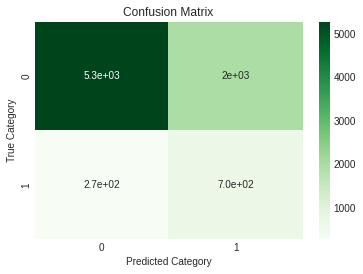

In [663]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_hat)
fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('True Category')
plt.xlabel('Predicted Category')
plt.show()

**XGBoost**

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      7262
           1       0.33      0.59      0.42       973

    accuracy                           0.81      8235
   macro avg       0.64      0.72      0.66      8235
weighted avg       0.87      0.81      0.83      8235



<IPython.core.display.Javascript object>

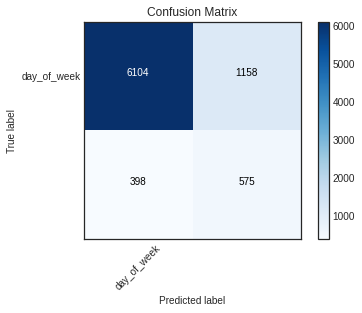

In [667]:
xgboost = XGBClassifier(max_depth=11, 
                            learning_rate=0.1, 
                            n_estimators=70, 
                            min_child_weight=2, 
                            subsample=0.5, 
                            n_jobs=-1)
y_pred = xgboost.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, y_pred))
conf_matrix(confusion_matrix(y_test, y_pred))
#plot_feature_importances(xgboost)

**Applying XGBoost**

In [665]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = XGBClassifier()
model = GridSearchCV(clf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

KeyboardInterrupt: ignored